In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/final.csv', index_col=0)

In [3]:
pd.options.display.max_columns= 50

In [4]:
df.shape

(30700, 21)

In [5]:
df.head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,state,make_model
53978,Accident,2003-01-01,"PEACHTREE CITY, GA",United States,non-fatal,Substantial,Unknown,Lonnie Johnson,Rv6A,1,Reciprocating,Personal,0,0,1,0,VMC,Cruise,2003,GA,Lonnie Johnson Rv6A
53979,Accident,2003-01-01,"STEPHENVILLE, TX",United States,non-fatal,Substantial,Unknown,Wood,Thorp T18,1,Reciprocating,Personal,0,1,1,0,VMC,Takeoff,2003,TX,Wood Thorp T18
53980,Accident,2003-01-01,"TUCSON, AZ",United States,fatal,Destroyed,Unknown,Beech,95,2,Reciprocating,Personal,1,3,0,0,VMC,Takeoff,2003,AZ,Beech 95
53981,Accident,2003-01-01,"Milford, UT",United States,non-fatal,Destroyed,Unknown,Aircraft Mfg,Ch2000,1,Reciprocating,Instructional,0,2,0,0,VMC,Cruise,2003,UT,Aircraft Mfg Ch2000
53982,Accident,2003-01-01,"Lansing, IL",United States,fatal,Destroyed,Unknown,Air Command,Commander Elite,1,Reciprocating,Personal,1,0,0,0,VMC,Maneuvering,2003,IL,Air Command Commander Elite


# Begin the Importing of David's EDA Notebook

In [6]:
df['year'].min()

2003

In [6]:
df['make'].value_counts()[:10]

Cessna         8711
Piper          4901
Beech          1849
Boeing         1526
Mooney          471
Air Tractor     287
Airbus          266
Bellanca        264
Maule           248
Bell            231
Name: make, dtype: int64

### Creating a Top-Ten DF

In [7]:
top_ten_names = list(df['make'].value_counts()[:10].index)
top_ten_names

['Cessna',
 'Piper',
 'Beech',
 'Boeing',
 'Mooney',
 'Air Tractor',
 'Airbus',
 'Bellanca',
 'Maule',
 'Bell']

In [8]:
top_ten_df = df.loc[df['make'].isin(top_ten_names) == True]
top_ten_df['make'].unique()

array(['Beech', 'Bell', 'Cessna', 'Mooney', 'Piper', 'Boeing',
       'Air Tractor', 'Bellanca', 'Maule', 'Airbus'], dtype=object)

# Data Trendlines

In [9]:
acc_trend = top_ten_df.loc[top_ten_df['investigation_type'] == "Accident"]['year'].value_counts().sort_index()

inc_trend = top_ten_df.loc[top_ten_df['investigation_type'] == "Incident"]['year'].value_counts().sort_index()

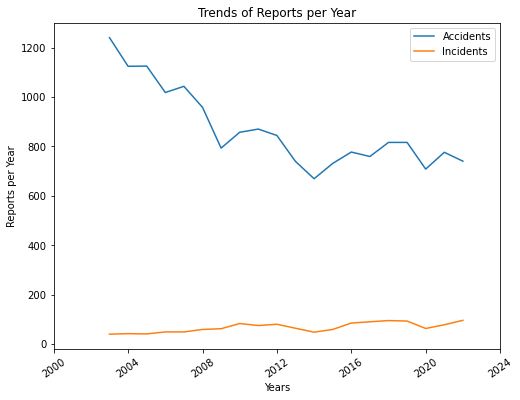

In [10]:
xticks = [2000, 2004, 2008, 2012, 2016, 2020, 2024]
acc_trend.plot(kind='line', figsize=(8, 6), ylabel="Reports per Year", xlabel="Years", 
           title='Trends of Reports per Year', xticks=xticks, rot=35)
inc_trend.plot(kind='line', figsize=(8, 6), ylabel="Reports per Year", xlabel="Years", 
           title='Trends of Reports per Year', xticks=xticks, rot=35, legend="Incidents")
plt.legend(["Accidents", "Incidents"])
plt.figsave;

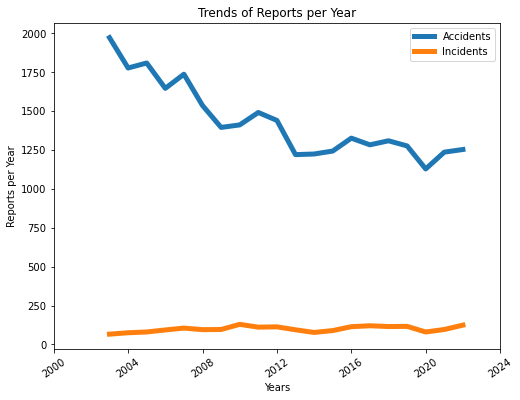

In [14]:
acc_trend = df.loc[df['investigation_type'] == "Accident"]['year'].value_counts().sort_index()

inc_trend = df.loc[df['investigation_type'] == "Incident"]['year'].value_counts().sort_index()


xticks = [2000, 2004, 2008, 2012, 2016, 2020, 2024]
acc_trend.plot(kind='line', figsize=(8, 6), ylabel="Reports per Year", xlabel="Years", 
    title='Trends of Reports per Year', xticks=xticks, rot=35, linewidth=5)
inc_trend.plot(kind='line', figsize=(8, 6), ylabel="Reports per Year", xlabel="Years", 
    title='Trends of Reports per Year', xticks=xticks, rot=35, legend="Incidents", linewidth=5)
plt.legend(["Accidents", "Incidents"])
plt.savefig("/Users/samalainabayeva/Desktop/FLAT_IRON!!!/TREND_CHART!.jpg");

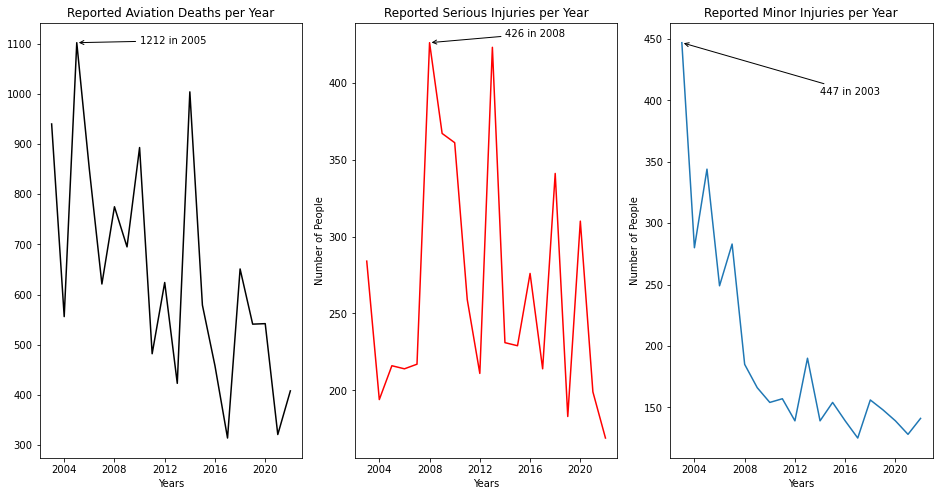

In [11]:
ser_inj_per_year = top_ten_df.groupby("year")['total_serious_injuries'].sum()
min_inj_per_year = top_ten_df.groupby("year")['total_minor_injuries'].sum()
deaths_per_year = top_ten_df.groupby("year")['total_fatal_injuries'].sum()

fig, ax = plt.subplots(ncols=3, figsize=(16, 8), sharey=False, sharex=True)

deaths_per_year.plot(kind='line', color="black",
                     title='Reported Aviation Deaths per Year', ax=ax[0], xlabel="Years",)
ax[0].annotate(text="1212 in 2005", xy=(2005, deaths_per_year.max()), 
        xytext=(2010, 1100), arrowprops=dict(arrowstyle='->'))
ax[0].set_xticks([2000, 2004, 2008, 2012, 2016, 2020, 2024])

ser_inj_per_year.plot(kind='line', title='Reported Serious Injuries per Year', ax=ax[1], 
                  ylabel="Number of People", xlabel="Years", color="red")
ax[1].annotate(text="426 in 2008", xy=(2008, ser_inj_per_year.max()), 
        xytext=(2014, 430), arrowprops=dict(arrowstyle='->'))

min_inj_per_year.plot(kind='line', title='Reported Minor Injuries per Year', ax=ax[2], 
                  ylabel="Number of People", xlabel="Years")
ax[2].annotate(text="447 in 2003", xy=(2003, min_inj_per_year.max()), 
        xytext=(2014, 405), arrowprops=dict(arrowstyle='->'));

# General Statistics for Top-Ten Planes

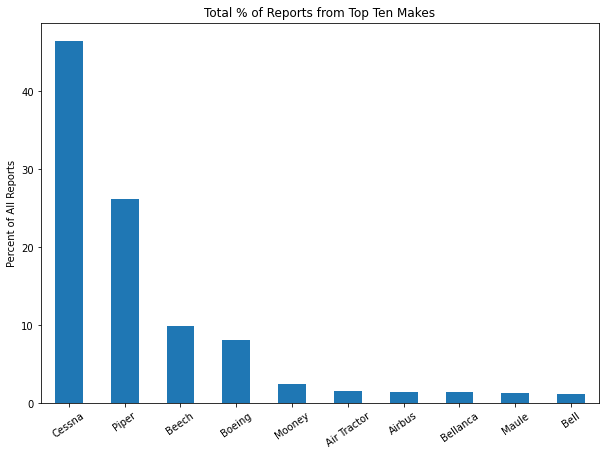

In [12]:
(top_ten_df['make'].value_counts(normalize=True)[:10] * 100).plot(kind="bar", rot=35, figsize=(10,7), 
                    title= "Total % of Reports from Top Ten Makes", ylabel="Percent of All Reports");

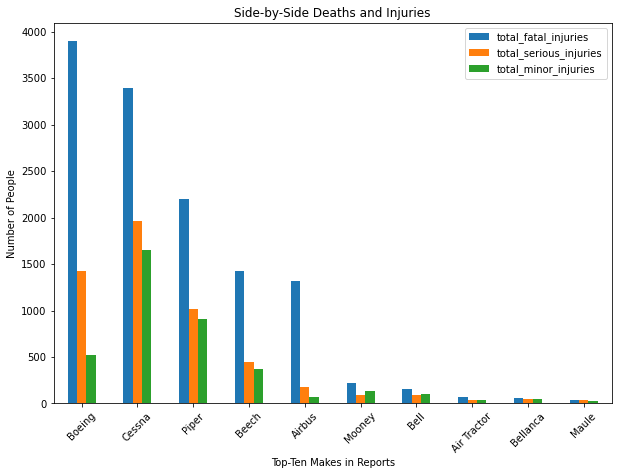

In [13]:
top_ten_df.groupby('make')[
    ["total_fatal_injuries", 'total_serious_injuries', 'total_minor_injuries']].sum().sort_values(
    by="total_fatal_injuries", ascending=False).plot(
    kind='bar', figsize=(10,7), title="Side-by-Side Deaths and Injuries", 
    ylabel="Number of People", xlabel= "Top-Ten Makes in Reports", rot=45);

In [14]:
top_ten_df.head(2)

,investigation_type,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,state
0,Accident,"TUCSON, AZ",United States,fatal,Destroyed,Unknown,Beech,95,2,Reciprocating,Personal,1,3,0,0,VMC,Takeoff,2003,AZ
2,Accident,"IDAHO FALLS, ID",United States,non-fatal,Substantial,Unknown,Bell,47G,1,Turbo Shaft,Other Work Use,0,0,0,1,VMC,Cruise,2003,ID


In [15]:
top_ten_df.loc[top_ten_df['make'] == 'Airbus']['total_fatal_injuries'].sort_values(ascending=False)[:10]

10109    228
18287    224
17276    162
11679    157
10233    152
5554     113
11319    103
23761     97
18844     66
9535       7
Name: total_fatal_injuries, dtype: int64

In [16]:
top_ten_df.loc[top_ten_df['make'] == 'Boeing']['total_fatal_injuries'].sort_values(ascending=False)[:10]

16762    295
16316    239
22036    188
23443    176
4545     160
11360    158
22352    157
9184     154
6283     154
14145    153
Name: total_fatal_injuries, dtype: int64

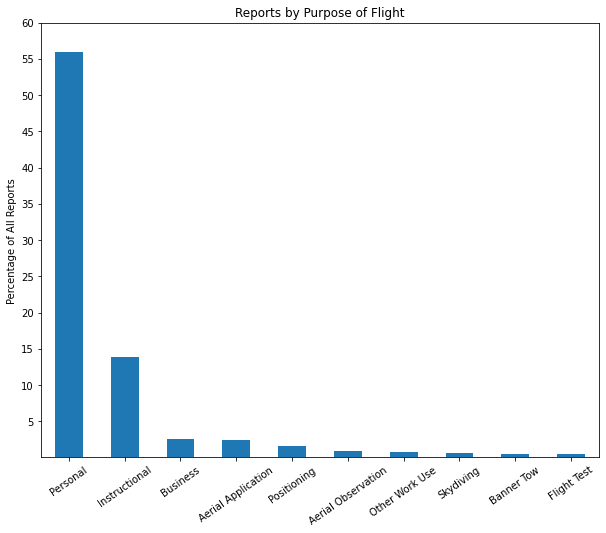

In [17]:
(top_ten_df['purpose_of_flight'].value_counts(normalize=True).drop("Unknown")[:10] * 100).plot(kind='bar', figsize=(10,8), 
        title="Reports by Purpose of Flight", ylabel="Percentage of All Reports", 
        rot=35, yticks=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]);

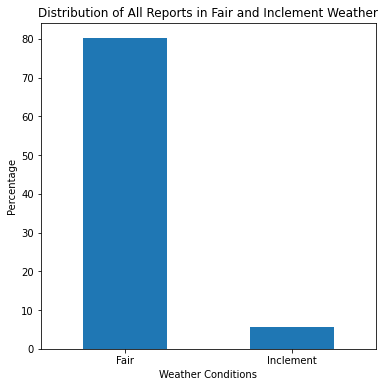

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
(df['weather_condition'].value_counts(normalize=True).drop(["Unk", "UNK", 'Unknown'])*100).plot(
    kind='bar', title="Distribution of All Reports in Fair and Inclement Weather", rot=0,
    ylabel="Percentage", xlabel="Weather Conditions")
ax.set_xticklabels(["Fair", "Inclement"]);

# Cessna

In [19]:
cessna = top_ten_df[top_ten_df['make'] == "Cessna"]

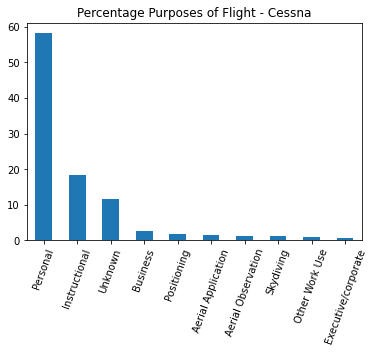

In [20]:
(cessna['purpose_of_flight'].value_counts(normalize=True)[:10]*100).plot(
    kind='bar', title="Percentage Purposes of Flight - Cessna", rot=70);

In [21]:
df.head(2)

,investigation_type,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,state
0,Accident,"TUCSON, AZ",United States,fatal,Destroyed,Unknown,Beech,95,2,Reciprocating,Personal,1,3,0,0,VMC,Takeoff,2003,AZ
1,Accident,"Milford, UT",United States,non-fatal,Destroyed,Unknown,Aircraft Mfg & Dev. Co. (Amd),Ch2000,1,Reciprocating,Instructional,0,2,0,0,VMC,Cruise,2003,UT


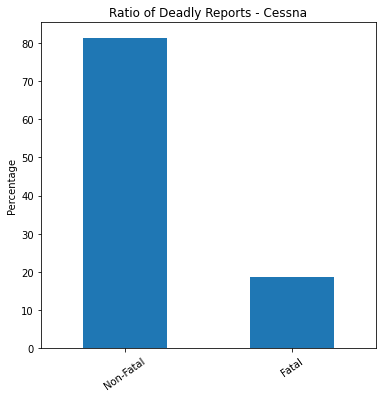

In [22]:
fig, ax = plt.subplots(figsize=(6,6))
(cessna['injury_severity'].value_counts(normalize=True)*100).plot(
    kind='bar', title = 'Ratio of Deadly Reports - Cessna', ylabel="Percentage", rot=35)
ax.set_xticklabels(["Non-Fatal", "Fatal"]);

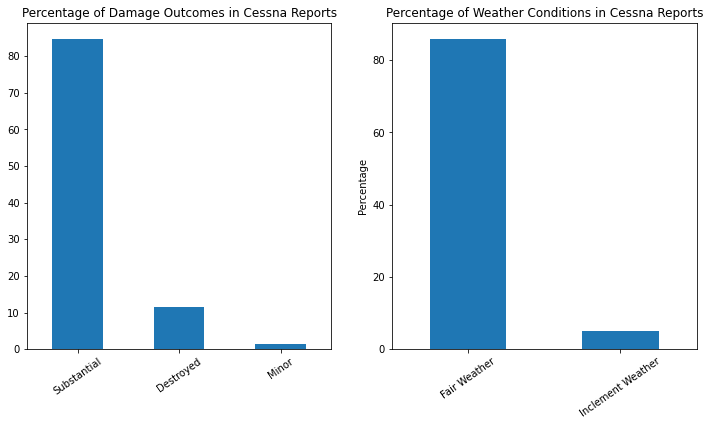

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
(cessna["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', ax=ax[0],
            title="Percentage of Damage Outcomes in Cessna Reports", rot=35)
(cessna['weather_condition'].value_counts(normalize=True).drop(
    ["Unknown", "Unk"])*100).plot(kind='bar', ax=ax[1], 
    title="Percentage of Weather Conditions in Cessna Reports", ylabel="Percentage");
ax[1].set_xticklabels(["Fair Weather", "Inclement Weather"], rotation=35);

### Fair Weather, Poor Weather Damage Categories, and Phase of Flight Breakdown

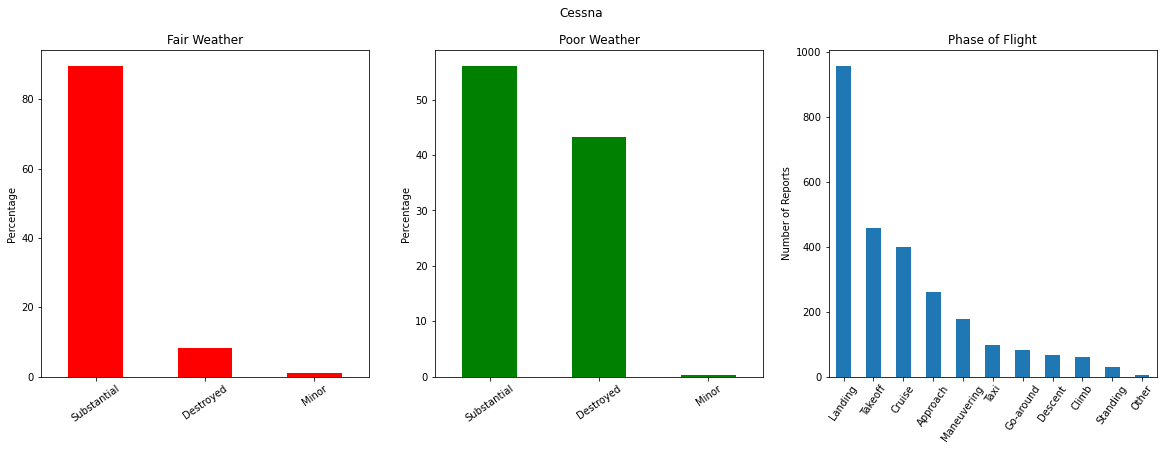

In [24]:
fig, ax = plt.subplots(ncols = 3, figsize= (20, 6))

(cessna.loc[cessna['weather_condition'] == "VMC"]['aircraft_damage'].value_counts(
    normalize=True).drop("Unknown")*100).plot(kind='bar', rot=35, ax=ax[0], color='red', 
    title="Fair Weather", ylabel="Percentage")

(cessna.loc[cessna['weather_condition'] == "IMC"]['aircraft_damage'].value_counts(
    normalize=True).drop("Unknown")*100).plot(kind='bar', 
    rot=35, color='green', ax=ax[1], title="Poor Weather", ylabel="Percentage")

cessna['broad_phase_of_flight'].value_counts().drop('Unknown').plot(
    kind='bar', title="Phase of Flight", rot=55, ylabel="Number of Reports")
plt.suptitle("Cessna");

## All Damage Outcomes, Grouped by Weather Nominally, then by Percentage

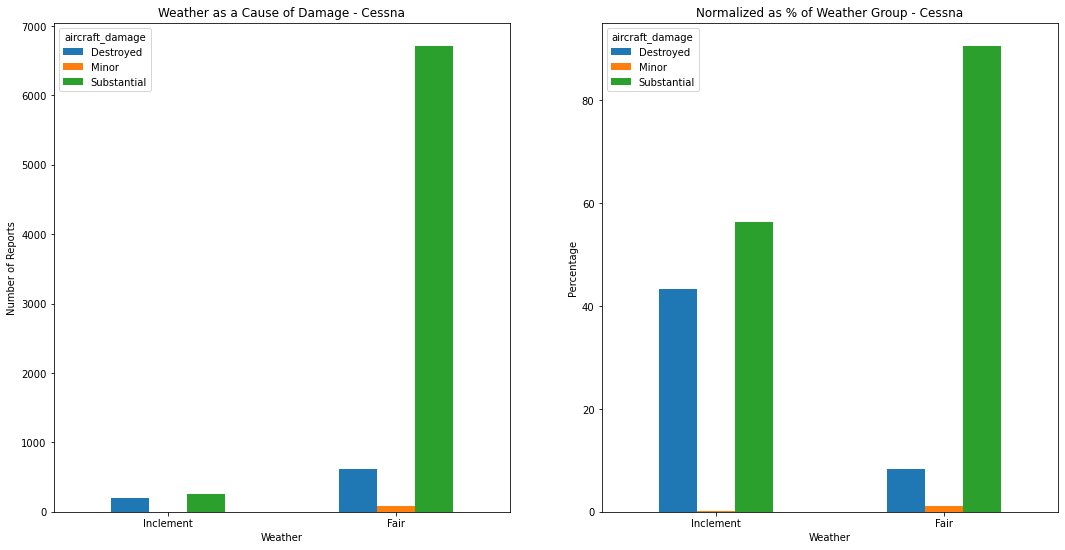

In [25]:
grouped_data = cessna.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
grouped_data.drop(["Unknown"], axis=1, inplace=True)

fig, ax = plt.subplots(ncols=2, figsize=(18,9))
normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

grouped_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather", 
    title="Weather as a Cause of Damage - Cessna", ax=ax[0], ylabel = "Number of Reports")
ax[0].set_xticklabels(["Inclement", "Fair"])

normalized_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized as % of Weather Group - Cessna", ax=ax[1], ylabel="Percentage")
ax[1].set_xticklabels(["Inclement", "Fair"]);

# Piper

In [26]:
piper = top_ten_df[top_ten_df['make'] == "Piper"]

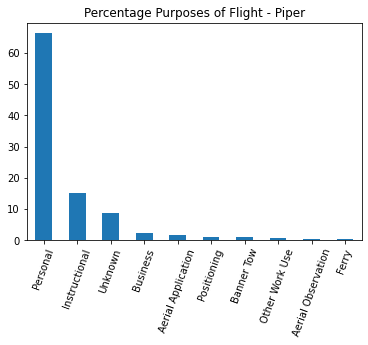

In [27]:
(piper['purpose_of_flight'].value_counts(normalize=True)[:10]*100).plot(
    kind='bar', title="Percentage Purposes of Flight - Piper", rot=70);

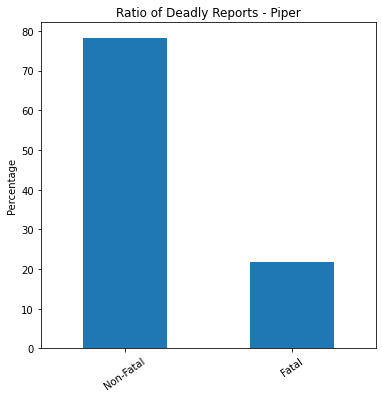

In [28]:
fig, ax = plt.subplots(figsize=(6,6))
(piper['injury_severity'].value_counts(normalize=True)*100).plot(
    kind='bar', title = 'Ratio of Deadly Reports - Piper', ylabel="Percentage", rot=35)
ax.set_xticklabels(["Non-Fatal", "Fatal"]);

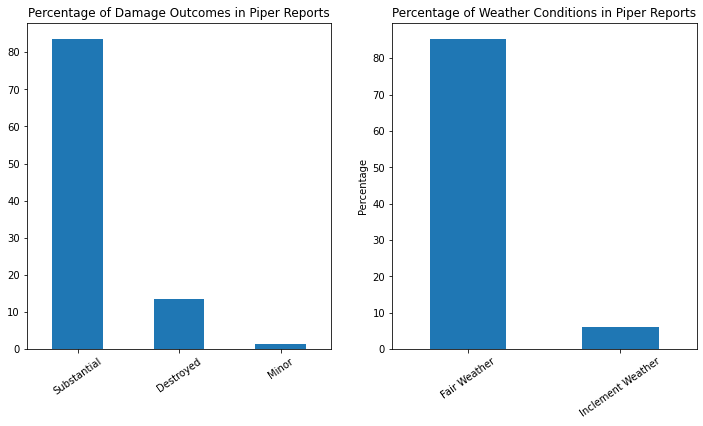

In [29]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
(piper["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', ax=ax[0],
            title="Percentage of Damage Outcomes in Piper Reports", rot=35)
(piper['weather_condition'].value_counts(normalize=True).drop(
    ["Unknown", "Unk"])*100).plot(kind='bar', ax=ax[1], 
    title="Percentage of Weather Conditions in Piper Reports", ylabel="Percentage");
ax[1].set_xticklabels(["Fair Weather", "Inclement Weather"], rotation=35);

### Fair Weather, Poor Weather Damage Categories, and Phase of Flight Breakdown

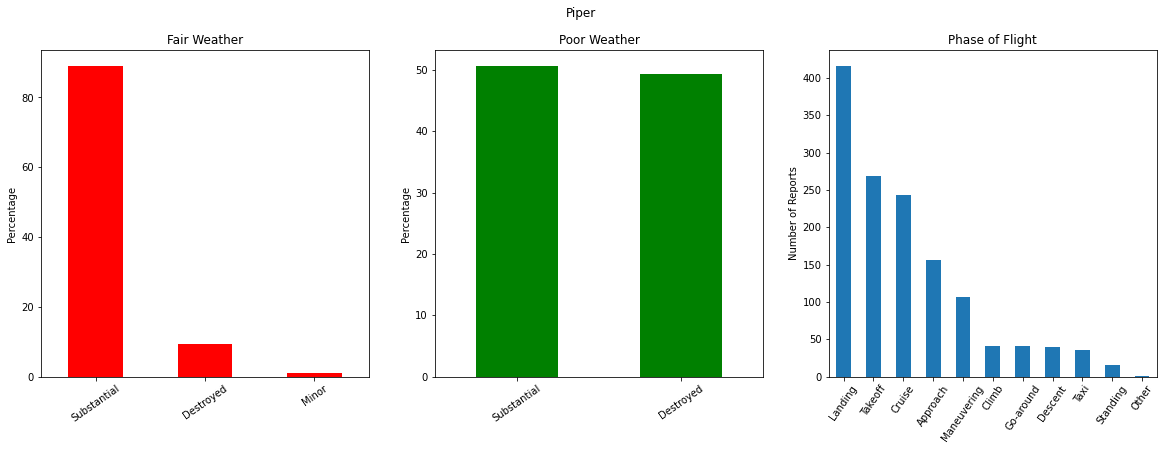

In [30]:
fig, ax = plt.subplots(ncols = 3, figsize= (20, 6))

(piper.loc[piper['weather_condition'] == "VMC"]['aircraft_damage'].value_counts(
    normalize=True).drop("Unknown")*100).plot(kind='bar', rot=35, ax=ax[0], color='red', 
    title="Fair Weather", ylabel="Percentage")

(piper.loc[piper['weather_condition'] == "IMC"]['aircraft_damage'].value_counts(
    normalize=True)*100).plot(kind='bar', 
    rot=35, color='green', ax=ax[1], title="Poor Weather", ylabel="Percentage")

piper['broad_phase_of_flight'].value_counts().drop('Unknown').plot(
    kind='bar', title="Phase of Flight", rot=55, ylabel="Number of Reports")
plt.suptitle("Piper");

## All Damage Outcomes, Grouped by Weather Nominally, then by Percentage

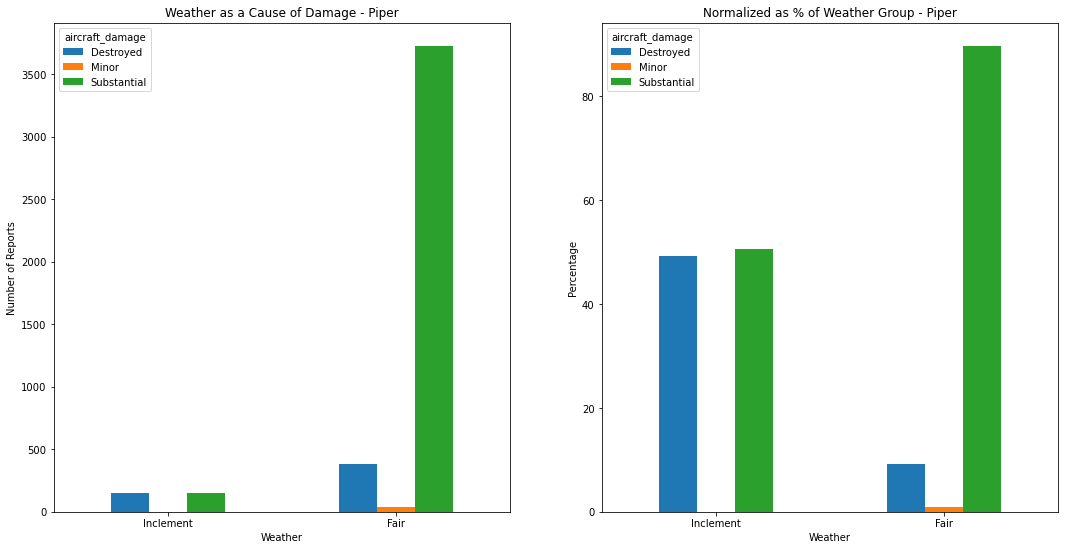

In [31]:
grouped_data = piper.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
grouped_data.drop(["Unknown"], axis=1, inplace=True)

fig, ax = plt.subplots(ncols=2, figsize=(18,9))
normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

grouped_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather", 
    title="Weather as a Cause of Damage - Piper", ax=ax[0], ylabel = "Number of Reports")
ax[0].set_xticklabels(["Inclement", "Fair"])

normalized_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized as % of Weather Group - Piper", ax=ax[1], ylabel="Percentage")
ax[1].set_xticklabels(["Inclement", "Fair"]);

# Beech

In [32]:
beech = top_ten_df[top_ten_df['make'] == "Beech"]

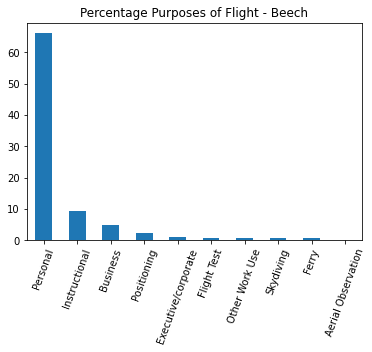

In [33]:
(beech['purpose_of_flight'].value_counts(normalize=True).drop("Unknown")[:10]*100).plot(
    kind='bar', title="Percentage Purposes of Flight - Beech", rot=70);

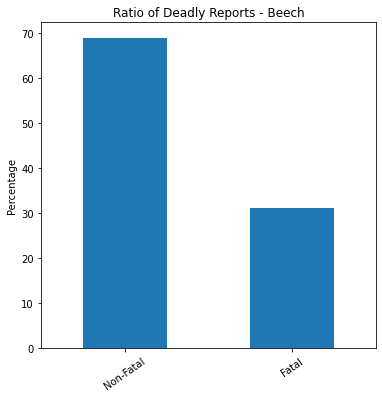

In [34]:
fig, ax = plt.subplots(figsize=(6,6))
(beech['injury_severity'].value_counts(normalize=True)*100).plot(
    kind='bar', title = 'Ratio of Deadly Reports - Beech', ylabel="Percentage", rot=35)
ax.set_xticklabels(["Non-Fatal", "Fatal"]);

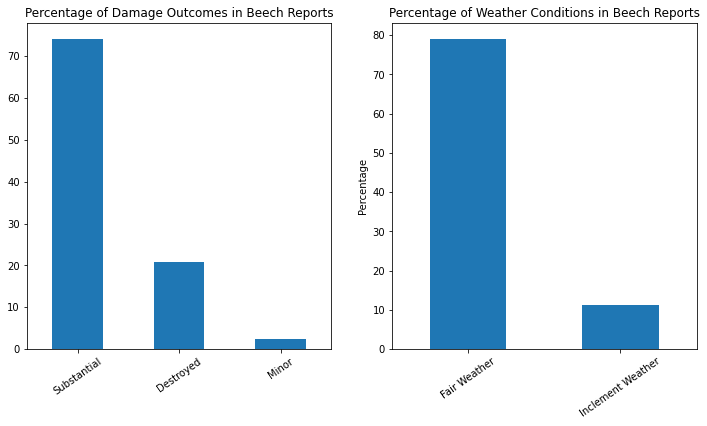

In [35]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
(beech["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', ax=ax[0],
            title="Percentage of Damage Outcomes in Beech Reports", rot=35)
(beech['weather_condition'].value_counts(normalize=True).drop(
    ["Unknown", "Unk"])*100).plot(kind='bar', ax=ax[1], 
    title="Percentage of Weather Conditions in Beech Reports", ylabel="Percentage");
ax[1].set_xticklabels(["Fair Weather", "Inclement Weather"], rotation=35);

### Fair Weather, Poor Weather Damage Categories, and Phase of Flight Breakdown

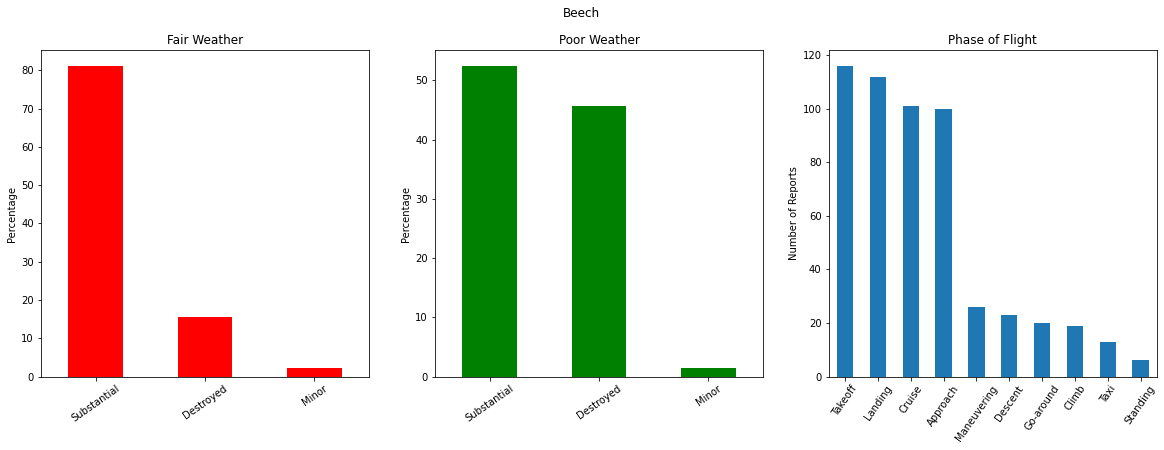

In [36]:
fig, ax = plt.subplots(ncols = 3, figsize= (20, 6))

(beech.loc[beech['weather_condition'] == "VMC"]['aircraft_damage'].value_counts(
    normalize=True).drop("Unknown")*100).plot(kind='bar', rot=35, ax=ax[0], color='red', 
    title="Fair Weather", ylabel="Percentage")

(beech.loc[beech['weather_condition'] == "IMC"]['aircraft_damage'].value_counts(
    normalize=True).drop("Unknown")*100).plot(kind='bar', 
    rot=35, color='green', ax=ax[1], title="Poor Weather", ylabel="Percentage")

beech['broad_phase_of_flight'].value_counts().drop('Unknown').plot(
    kind='bar', title="Phase of Flight", rot=55, ylabel="Number of Reports")
plt.suptitle("Beech");

## All Damage Outcomes, Grouped by Weather Nominally, then by Percentage

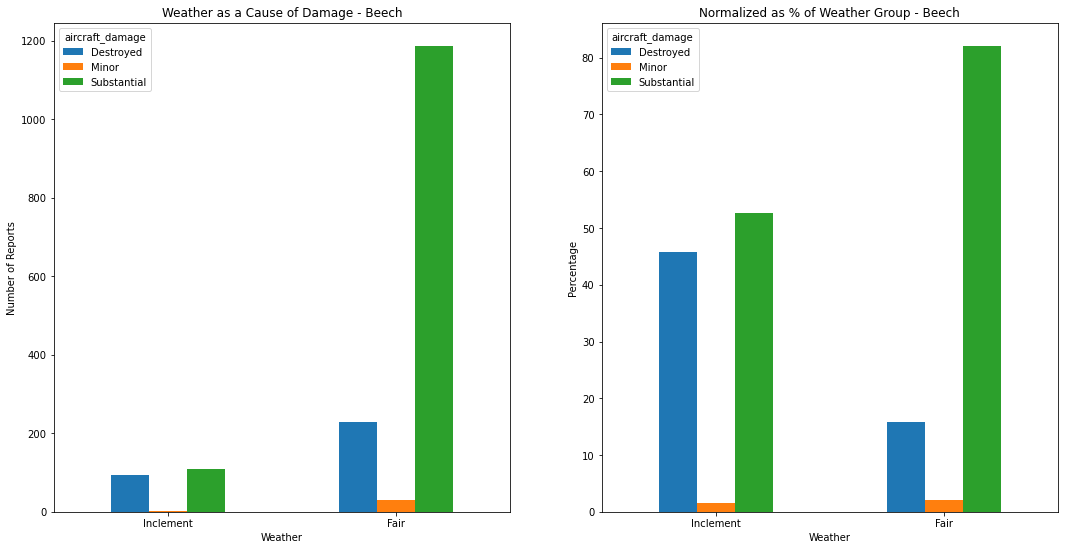

In [37]:
grouped_data = beech.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
grouped_data.drop(["Unknown"], axis=1, inplace=True)

fig, ax = plt.subplots(ncols=2, figsize=(18,9))
normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

grouped_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather", 
    title="Weather as a Cause of Damage - Beech", ax=ax[0], ylabel = "Number of Reports")
ax[0].set_xticklabels(["Inclement", "Fair"])

normalized_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized as % of Weather Group - Beech", ax=ax[1], ylabel="Percentage")
ax[1].set_xticklabels(["Inclement", "Fair"]);

# Boeing

In [38]:
boeing = top_ten_df[top_ten_df['make'] == "Boeing"]

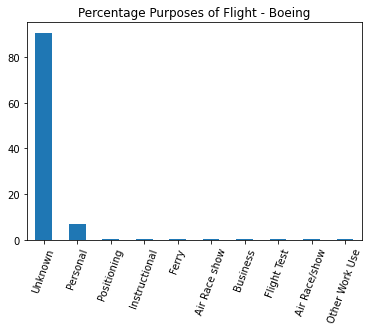

In [39]:
(boeing['purpose_of_flight'].value_counts(normalize=True)[:10]*100).plot(
    kind='bar', title="Percentage Purposes of Flight - Boeing", rot=70);

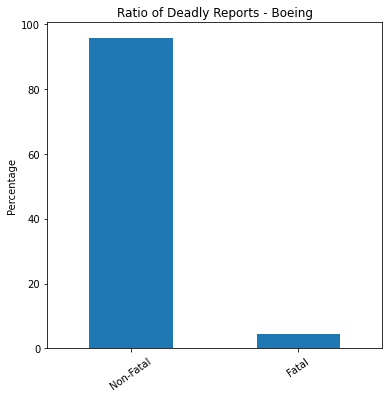

In [40]:
fig, ax = plt.subplots(figsize=(6,6))
(boeing['injury_severity'].value_counts(normalize=True)*100).plot(
    kind='bar', title = 'Ratio of Deadly Reports - Boeing', ylabel="Percentage", rot=35)
ax.set_xticklabels(["Non-Fatal", "Fatal"]);

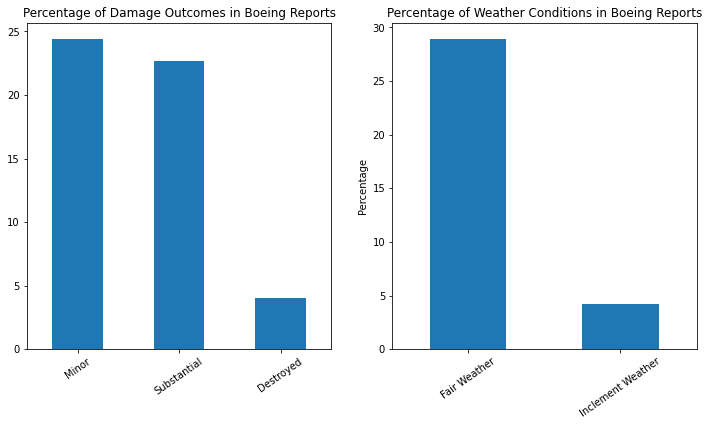

In [367]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
(boeing["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', ax=ax[0],
            title="Percentage of Damage Outcomes in Boeing Reports", rot=35)
(boeing['weather_condition'].value_counts(normalize=True).drop(
    ["Unknown", "Unk"])*100).plot(kind='bar', ax=ax[1], 
    title="Percentage of Weather Conditions in Boeing Reports", ylabel="Percentage")
ax[1].set_xticklabels(["Fair Weather", "Inclement Weather"], rotation=35)
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/boeing_3.jpg', bbox_inches='tight', pad_inches=0.1);

### Fair Weather, Poor Weather Damage Categories, and Phase of Flight Breakdown

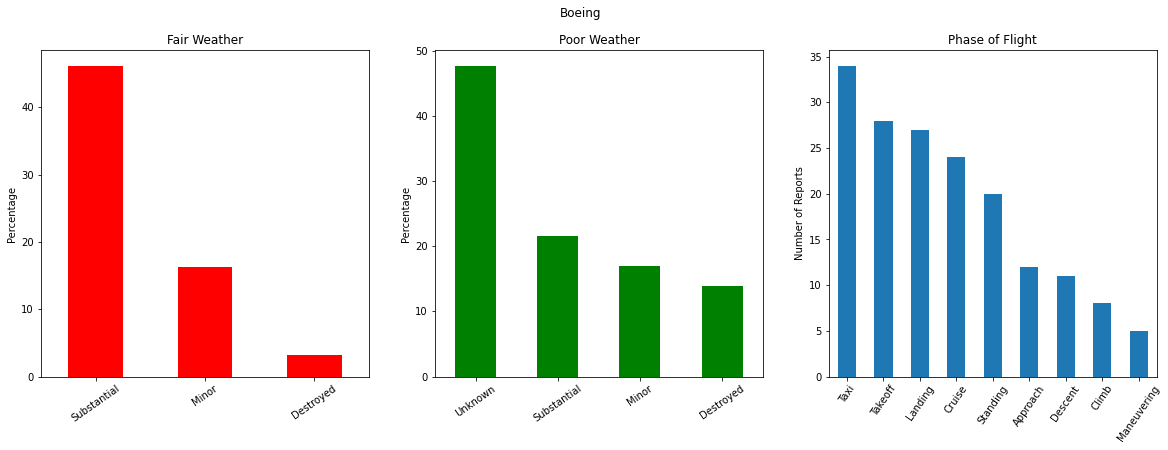

In [365]:
fig, ax = plt.subplots(ncols = 3, figsize= (20, 6))

(boeing.loc[boeing['weather_condition'] == "VMC"]['aircraft_damage'].value_counts(
    normalize=True).drop("Unknown")*100).plot(kind='bar', rot=35, ax=ax[0], color='red', 
    title="Fair Weather", ylabel="Percentage")

(boeing.loc[boeing['weather_condition'] == "IMC"]['aircraft_damage'].value_counts(
    normalize=True)*100).plot(kind='bar', 
    rot=35, color='green', ax=ax[1], title="Poor Weather", ylabel="Percentage")

boeing['broad_phase_of_flight'].value_counts().drop('Unknown').plot(
    kind='bar', title="Phase of Flight", rot=55, ylabel="Number of Reports")
plt.suptitle("Boeing")
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/boeing_2.jpg', bbox_inches='tight', pad_inches=0.1);

## All Damage Outcomes, Grouped by Weather Nominally, then by Percentage

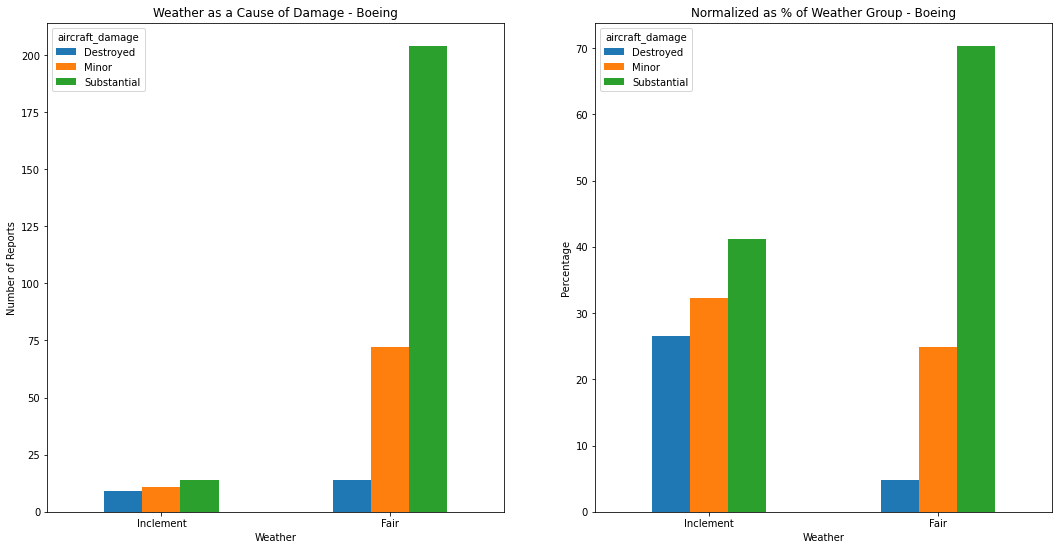

In [43]:
grouped_data = boeing.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
grouped_data.drop(["Unknown"], axis=1, inplace=True)

fig, ax = plt.subplots(ncols=2, figsize=(18,9))
normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

grouped_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather", 
    title="Weather as a Cause of Damage - Boeing", ax=ax[0], ylabel = "Number of Reports")
ax[0].set_xticklabels(["Inclement", "Fair"])

normalized_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized as % of Weather Group - Boeing", ax=ax[1], ylabel="Percentage")
ax[1].set_xticklabels(["Inclement", "Fair"]);

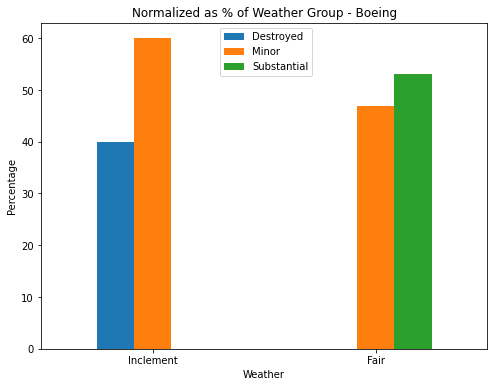

In [363]:
fig, ax = plt.subplots(figsize=(8,6))

normalized_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized as % of Weather Group - Boeing", ax=ax, ylabel="Percentage")
ax.set_xticklabels(["Inclement", "Fair"])
plt.legend(title="Aircraft Damage")
plt.legend(bbox_to_anchor=(.39, 1))

plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/boeing_1.jpg', bbox_inches='tight', pad_inches=0.1);

# Mooney

In [44]:
mooney = top_ten_df[top_ten_df['make'] == "Mooney"]

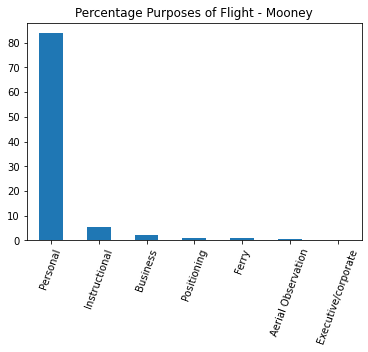

In [45]:
(mooney['purpose_of_flight'].value_counts(normalize=True).drop("Unknown")[:10]*100).plot(
    kind='bar', title="Percentage Purposes of Flight - Mooney", rot=70);

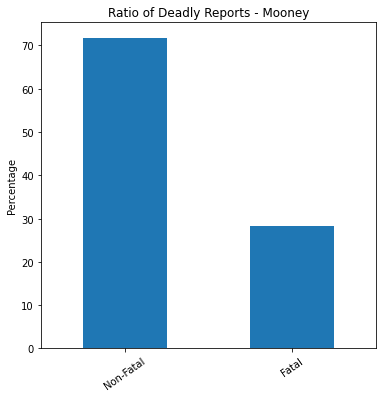

In [46]:
fig, ax = plt.subplots(figsize=(6,6))
(mooney['injury_severity'].value_counts(normalize=True)*100).plot(
    kind='bar', title = 'Ratio of Deadly Reports - Mooney', ylabel="Percentage", rot=35)
ax.set_xticklabels(["Non-Fatal", "Fatal"]);

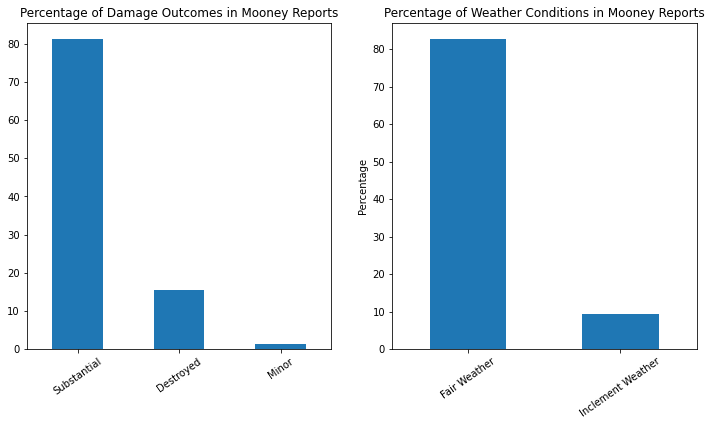

In [47]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
(mooney["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', ax=ax[0],
            title="Percentage of Damage Outcomes in Mooney Reports", rot=35)
(mooney['weather_condition'].value_counts(normalize=True).drop(
    ["Unknown", "Unk"])*100).plot(kind='bar', ax=ax[1], 
    title="Percentage of Weather Conditions in Mooney Reports", ylabel="Percentage");
ax[1].set_xticklabels(["Fair Weather", "Inclement Weather"], rotation=35);

### Fair Weather, Poor Weather Damage Categories, and Phase of Flight Breakdown

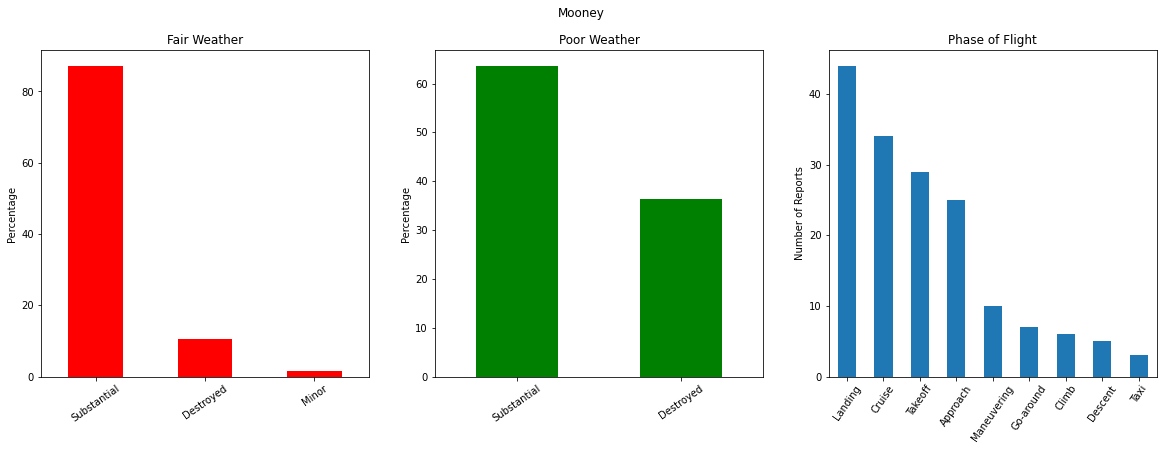

In [48]:
fig, ax = plt.subplots(ncols = 3, figsize= (20, 6))

(mooney.loc[mooney['weather_condition'] == "VMC"]['aircraft_damage'].value_counts(
    normalize=True).drop("Unknown")*100).plot(kind='bar', rot=35, ax=ax[0], color='red', 
    title="Fair Weather", ylabel="Percentage")

(mooney.loc[mooney['weather_condition'] == "IMC"]['aircraft_damage'].value_counts(
    normalize=True)*100).plot(kind='bar', 
    rot=35, color='green', ax=ax[1], title="Poor Weather", ylabel="Percentage")

mooney['broad_phase_of_flight'].value_counts().drop('Unknown').plot(
    kind='bar', title="Phase of Flight", rot=55, ylabel="Number of Reports")
plt.suptitle("Mooney");

## All Damage Outcomes, Grouped by Weather Nominally, then by Percentage

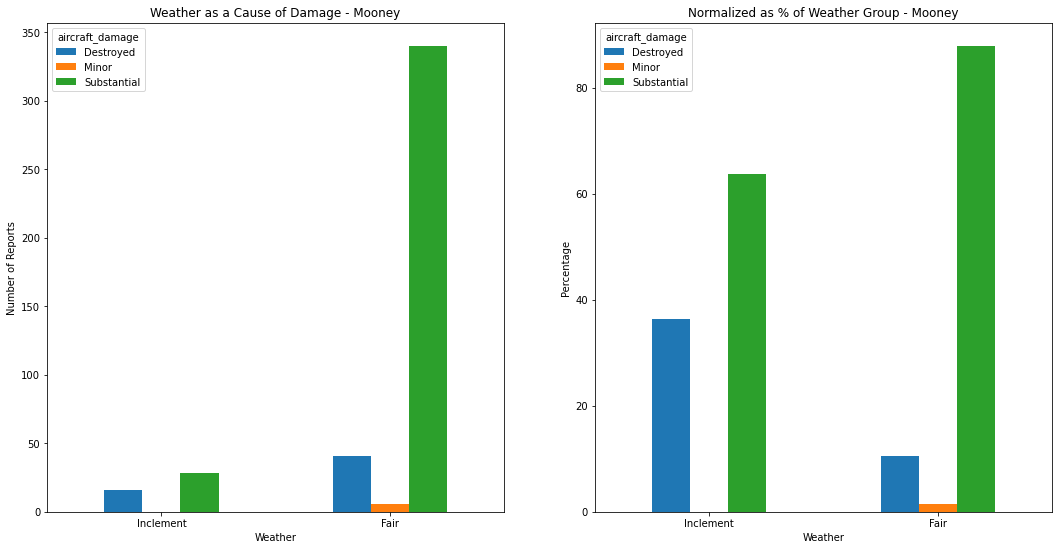

In [49]:
grouped_data = mooney.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
grouped_data.drop(["Unknown"], axis=1, inplace=True)

fig, ax = plt.subplots(ncols=2, figsize=(18,9))
normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

grouped_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather", 
    title="Weather as a Cause of Damage - Mooney", ax=ax[0], ylabel = "Number of Reports")
ax[0].set_xticklabels(["Inclement", "Fair"])

normalized_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized as % of Weather Group - Mooney", ax=ax[1], ylabel="Percentage")
ax[1].set_xticklabels(["Inclement", "Fair"]);

# Air Tractor

In [50]:
air_tractor = top_ten_df[top_ten_df['make'] == "Air Tractor"]

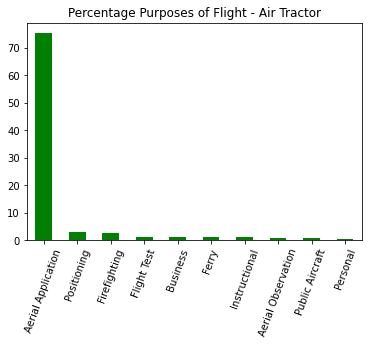

In [330]:
(air_tractor['purpose_of_flight'].value_counts(normalize=True).drop("Unknown")[:10]*100).plot(
    kind='bar', title="Percentage Purposes of Flight - Air Tractor", rot=70, color='green')
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/AT_purpose.jpg', bbox_inches='tight', pad_inches=0.1);

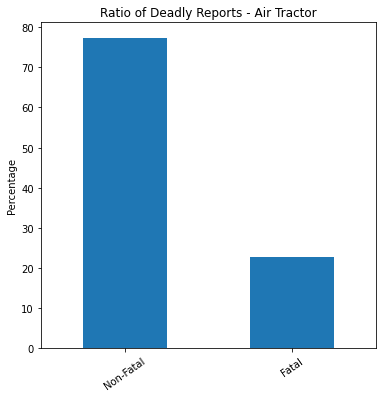

In [52]:
fig, ax = plt.subplots(figsize=(6,6))
(air_tractor['injury_severity'].value_counts(normalize=True)*100).plot(
    kind='bar', title = 'Ratio of Deadly Reports - Air Tractor', ylabel="Percentage", rot=35)
ax.set_xticklabels(["Non-Fatal", "Fatal"]);

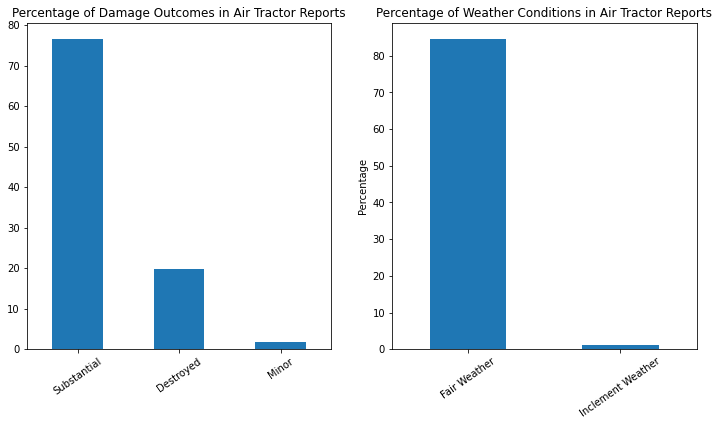

In [53]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
(air_tractor["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', ax=ax[0],
            title="Percentage of Damage Outcomes in Air Tractor Reports", rot=35)
(air_tractor['weather_condition'].value_counts(normalize=True).drop(
    ["Unknown", "Unk"])*100).plot(kind='bar', ax=ax[1], 
    title="Percentage of Weather Conditions in Air Tractor Reports", ylabel="Percentage");
ax[1].set_xticklabels(["Fair Weather", "Inclement Weather"], rotation=35);

### Fair Weather, Poor Weather Damage Categories, and Phase of Flight Breakdown

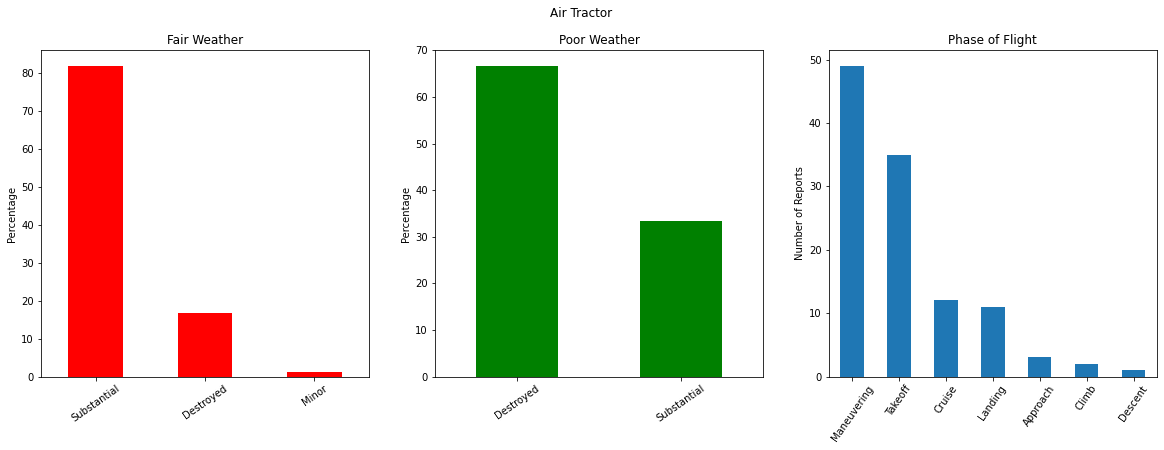

In [54]:
fig, ax = plt.subplots(ncols = 3, figsize= (20, 6))

(air_tractor.loc[air_tractor['weather_condition'] == "VMC"]['aircraft_damage'].value_counts(
    normalize=True)*100).plot(kind='bar', rot=35, ax=ax[0], color='red', 
    title="Fair Weather", ylabel="Percentage")

(air_tractor.loc[air_tractor['weather_condition'] == "IMC"]['aircraft_damage'].value_counts(
    normalize=True)*100).plot(kind='bar', 
    rot=35, color='green', ax=ax[1], title="Poor Weather", ylabel="Percentage")

air_tractor['broad_phase_of_flight'].value_counts().drop('Unknown').plot(
    kind='bar', title="Phase of Flight", rot=55, ylabel="Number of Reports")
plt.suptitle("Air Tractor");

## All Damage Outcomes, Grouped by Weather Nominally, then by Percentage

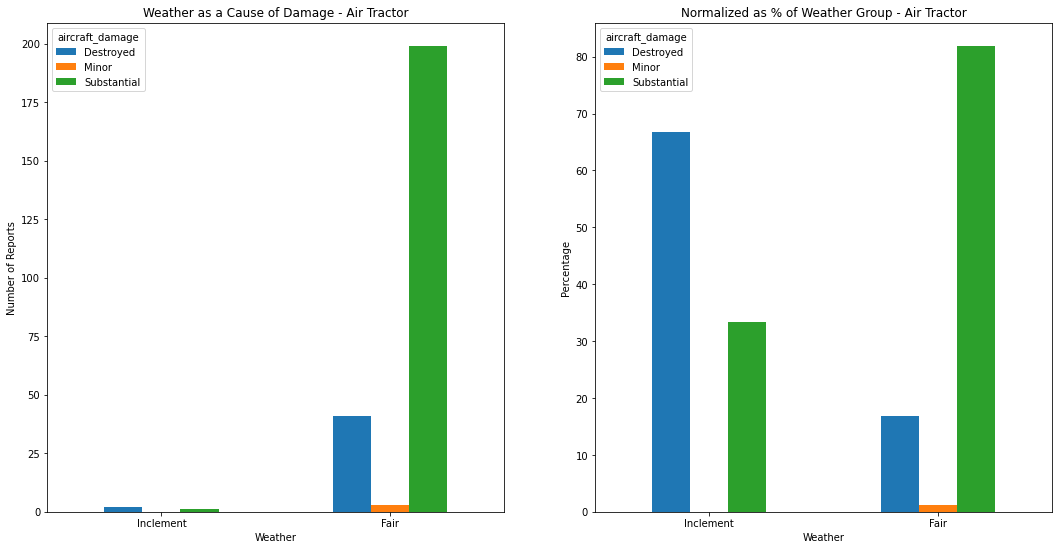

In [55]:
grouped_data = air_tractor.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
grouped_data.drop(["Unknown"], axis=1, inplace=True)

fig, ax = plt.subplots(ncols=2, figsize=(18,9))
normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

grouped_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather", 
    title="Weather as a Cause of Damage - Air Tractor", ax=ax[0], ylabel = "Number of Reports")
ax[0].set_xticklabels(["Inclement", "Fair"])

normalized_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized as % of Weather Group - Air Tractor", ax=ax[1], ylabel="Percentage")
ax[1].set_xticklabels(["Inclement", "Fair"]);

# Adding Grumman Here even though it is outside the top ten, it is another workplane

## Grumman

In [56]:
grumman = df[df['make'] == "Grumman"]

In [57]:
grumman.head()

,investigation_type,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,state
40,Accident,"PARKER, AZ",United States,fatal,Substantial,Unknown,Grumman,F6F5,1,Reciprocating,Air Race/show,2,0,0,1,VMC,Approach,2003,AZ
445,Accident,"Chetumal, Mexico",Mexico,fatal,Destroyed,Airplane,Grumman,Hu16,0,Unknown,Personal,3,0,0,0,VMC,Unknown,2003,co
583,Accident,"BASIN CITY, WA",United States,non-fatal,Substantial,Unknown,Grumman,G164B,1,Turbo Prop,Aerial Application,0,0,0,1,VMC,Maneuvering,2003,WA
612,Accident,"NORTH PLATTE, NE",United States,non-fatal,Substantial,Unknown,Grumman,G164A,1,Reciprocating,Personal,0,0,0,1,VMC,Landing,2003,NE
657,Accident,"SENECA, KS",United States,non-fatal,Substantial,Unknown,Grumman,G164A,1,Reciprocating,Aerial Application,0,0,0,1,VMC,Landing,2003,KS


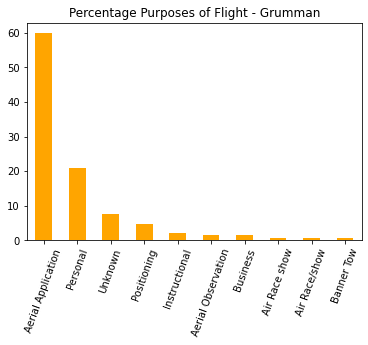

In [329]:
(grumman['purpose_of_flight'].value_counts(normalize=True)[:10]*100).plot(
    kind='bar', title="Percentage Purposes of Flight - Grumman", rot=70, color='orange')
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/Grumman_purpose.jpg', bbox_inches='tight', pad_inches=0.1);

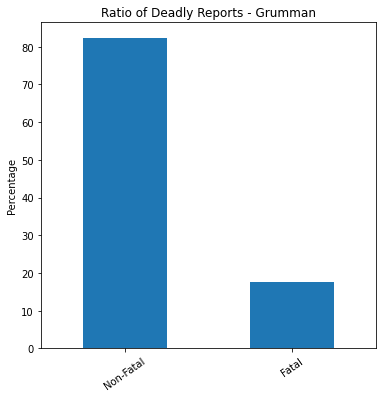

In [59]:
fig, ax = plt.subplots(figsize=(6,6))
(grumman['injury_severity'].value_counts(normalize=True)*100).plot(
    kind='bar', title = 'Ratio of Deadly Reports - Grumman', ylabel="Percentage", rot=35)
ax.set_xticklabels(["Non-Fatal", "Fatal"]);

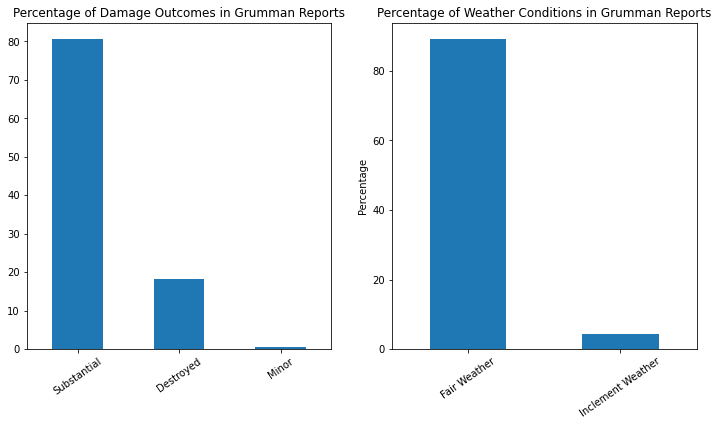

In [60]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
(grumman["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', ax=ax[0],
            title="Percentage of Damage Outcomes in Grumman Reports", rot=35)
(grumman['weather_condition'].value_counts(normalize=True).drop(
    "Unknown")*100).plot(kind='bar', ax=ax[1], 
    title="Percentage of Weather Conditions in Grumman Reports", ylabel="Percentage");
ax[1].set_xticklabels(["Fair Weather", "Inclement Weather"], rotation=35);

### Fair Weather, Poor Weather Damage Categories, and Phase of Flight Breakdown

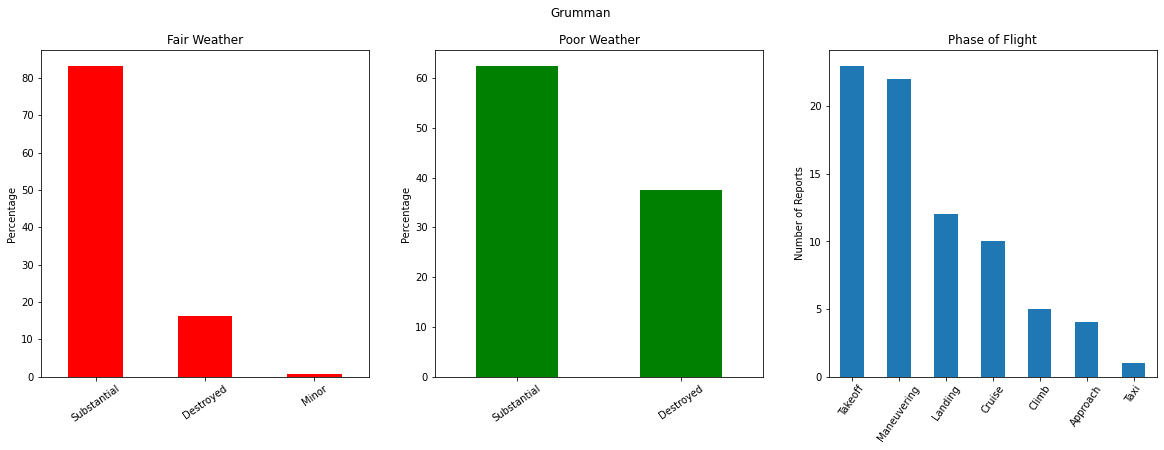

In [61]:
fig, ax = plt.subplots(ncols = 3, figsize= (20, 6))

(grumman.loc[grumman['weather_condition'] == "VMC"]['aircraft_damage'].value_counts(
    normalize=True)*100).plot(kind='bar', rot=35, ax=ax[0], color='red', 
    title="Fair Weather", ylabel="Percentage")

(grumman.loc[grumman['weather_condition'] == "IMC"]['aircraft_damage'].value_counts(
    normalize=True)*100).plot(kind='bar', 
    rot=35, color='green', ax=ax[1], title="Poor Weather", ylabel="Percentage")

grumman['broad_phase_of_flight'].value_counts().drop('Unknown').plot(
    kind='bar', title="Phase of Flight", rot=55, ylabel="Number of Reports")
plt.suptitle("Grumman");

## All Damage Outcomes, Grouped by Weather Nominally, then by Percentage

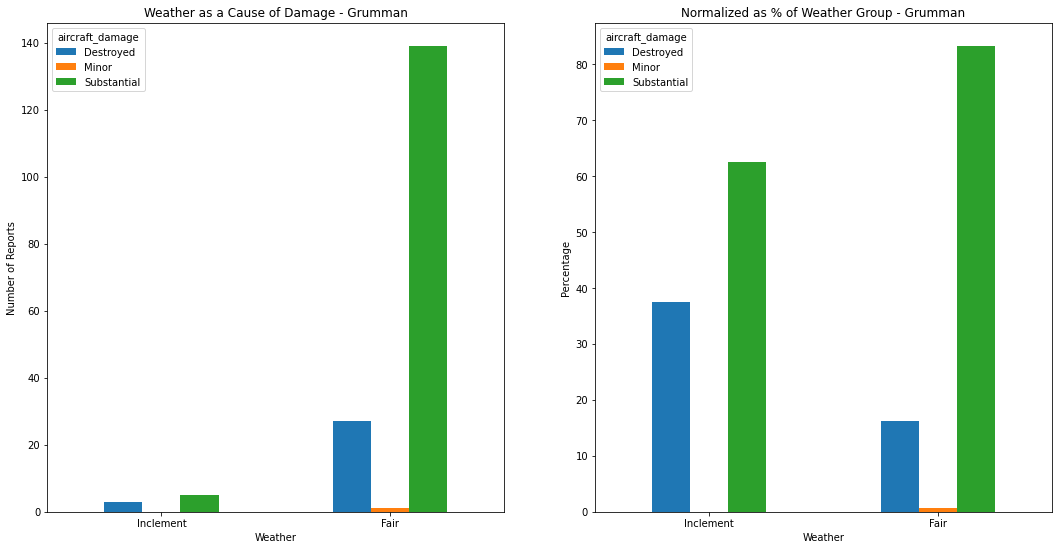

In [62]:
grouped_data = grumman.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
grouped_data.drop(["Unknown"], axis=1, inplace=True)

fig, ax = plt.subplots(ncols=2, figsize=(18,9))
normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

grouped_data.drop("Unknown").plot(kind='bar', stacked=False, rot=0, xlabel="Weather", 
    title="Weather as a Cause of Damage - Grumman", ax=ax[0], ylabel = "Number of Reports")
ax[0].set_xticklabels(["Inclement", "Fair"])

normalized_data.drop("Unknown").plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized as % of Weather Group - Grumman", ax=ax[1], ylabel="Percentage")
ax[1].set_xticklabels(["Inclement", "Fair"]);

# Airbus

In [63]:
airbus = top_ten_df[top_ten_df['make'] == "Airbus"]

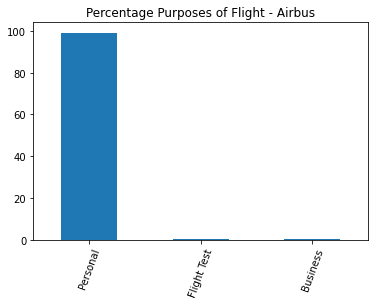

In [369]:
(airbus['purpose_of_flight'].replace("Unknown", "Personal").value_counts(normalize=True)[:10]*100).plot(
    kind='bar', title="Percentage Purposes of Flight - Airbus", rot=70)
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/airbus_0.jpg', bbox_inches='tight', pad_inches=0.2);

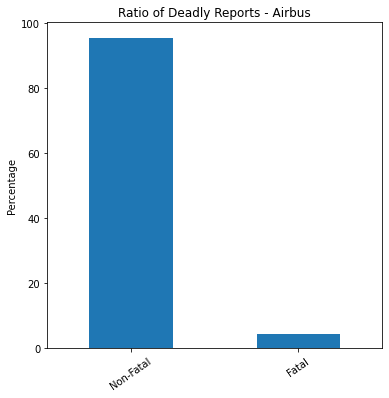

In [65]:
fig, ax = plt.subplots(figsize=(6,6))
(airbus['injury_severity'].value_counts(normalize=True)*100).plot(
    kind='bar', title = 'Ratio of Deadly Reports - Airbus', ylabel="Percentage", rot=35)
ax.set_xticklabels(["Non-Fatal", "Fatal"]);

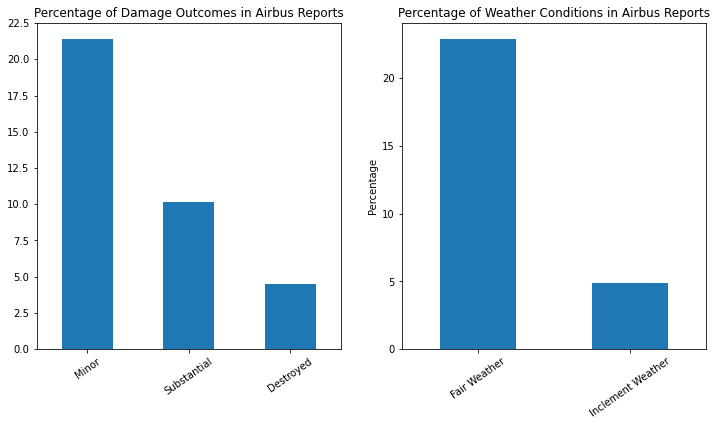

In [352]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
(airbus["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', ax=ax[0],
            title="Percentage of Damage Outcomes in Airbus Reports", rot=35)
(airbus['weather_condition'].value_counts(normalize=True).drop(
    ["Unknown", "Unk"])*100).plot(kind='bar', ax=ax[1], 
    title="Percentage of Weather Conditions in Airbus Reports", ylabel="Percentage");
ax[1].set_xticklabels(["Fair Weather", "Inclement Weather"], rotation=35)
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/airbus_1.jpg', bbox_inches='tight', pad_inches=0.1);

### Fair Weather, Poor Weather Damage Categories, and Phase of Flight Breakdown

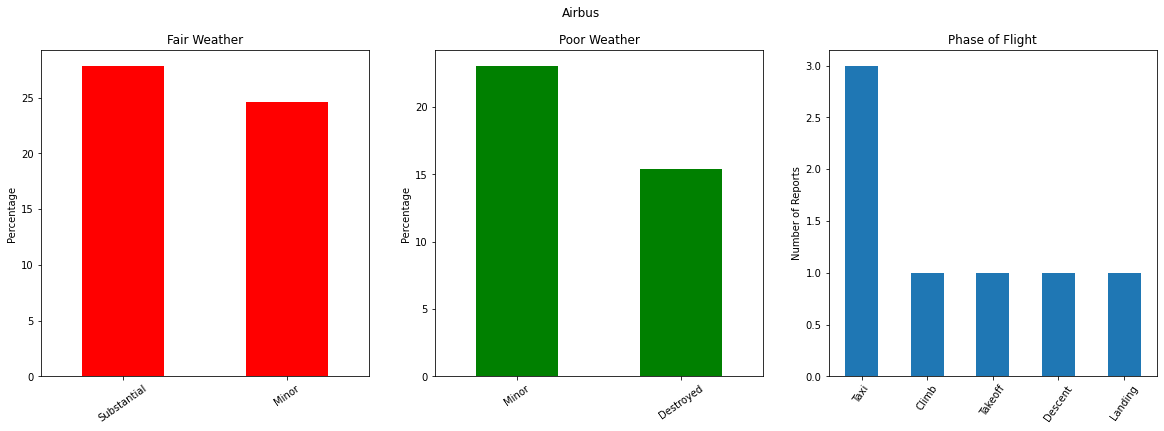

In [370]:
fig, ax = plt.subplots(ncols = 3, figsize= (20, 6))

(airbus.loc[airbus['weather_condition'] == "VMC"]['aircraft_damage'].value_counts(
    normalize=True).drop("Unknown")*100).plot(kind='bar', rot=35, ax=ax[0], color='red', 
    title="Fair Weather", ylabel="Percentage")

(airbus.loc[airbus['weather_condition'] == "IMC"]['aircraft_damage'].value_counts(
    normalize=True).drop("Unknown")*100).plot(kind='bar', 
    rot=35, color='green', ax=ax[1], title="Poor Weather", ylabel="Percentage")

airbus['broad_phase_of_flight'].value_counts().drop('Unknown').plot(
    kind='bar', title="Phase of Flight", rot=55, ylabel="Number of Reports")
plt.suptitle("Airbus")
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/airbus_5.jpg');

## All Damage Outcomes, Grouped by Weather Nominally, then by Percentage

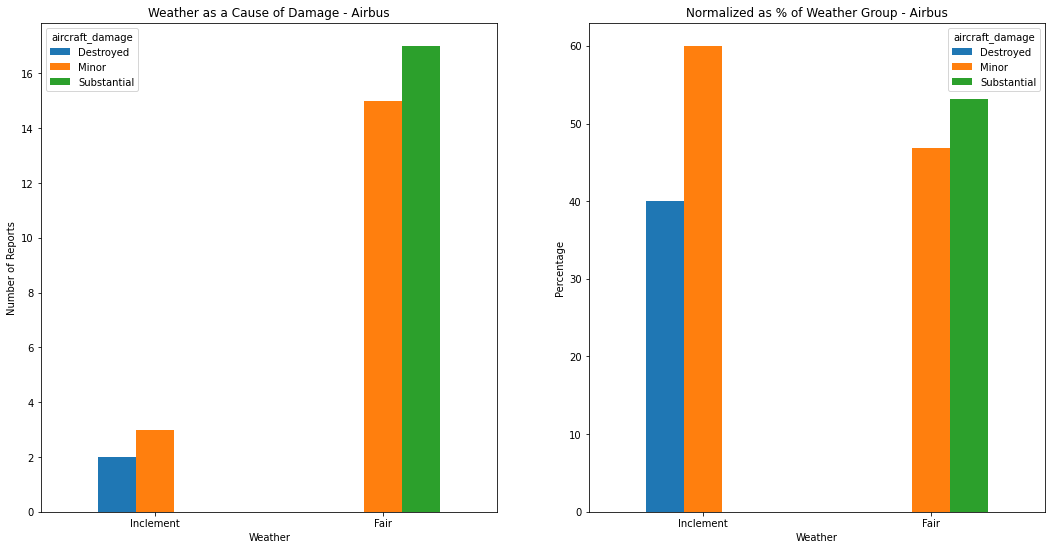

In [348]:
grouped_data = airbus.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
grouped_data.drop(["Unknown"], axis=1, inplace=True)

fig, ax = plt.subplots(ncols=2, figsize=(18,9))
normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

grouped_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather", 
    title="Weather as a Cause of Damage - Airbus", ax=ax[0], ylabel = "Number of Reports")
ax[0].set_xticklabels(["Inclement", "Fair"])

normalized_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized as % of Weather Group - Airbus", ax=ax[1], ylabel="Percentage")
ax[1].set_xticklabels(["Inclement", "Fair"])
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/airbus_2.jpg');

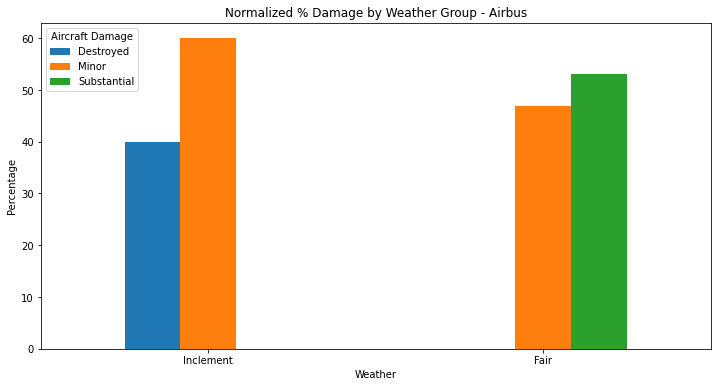

In [347]:
fig, ax = plt.subplots(figsize=(12,6))
normalized_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized % Damage by Weather Group - Airbus", ax=ax, ylabel="Percentage")
ax.set_xticklabels(["Inclement", "Fair"])
plt.legend(title="Aircraft Damage")
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/airbus_3.jpg');

# Bellanca

In [69]:
bellanca = top_ten_df[top_ten_df['make'] == "Bellanca"]

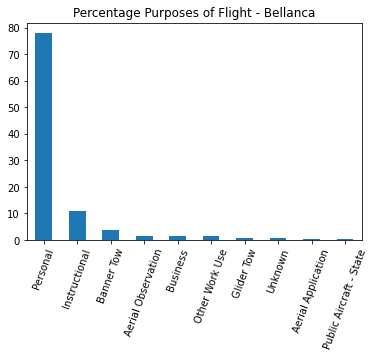

In [70]:
(bellanca['purpose_of_flight'].value_counts(normalize=True)[:10]*100).plot(
    kind='bar', title="Percentage Purposes of Flight - Bellanca", rot=70);

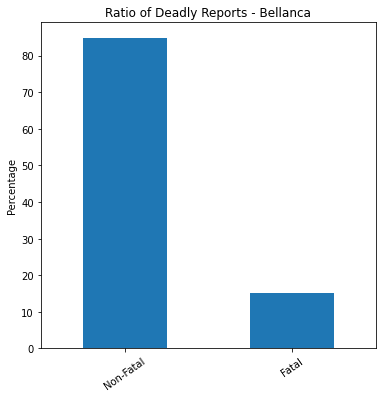

In [71]:
fig, ax = plt.subplots(figsize=(6,6))
(bellanca['injury_severity'].value_counts(normalize=True)*100).plot(
    kind='bar', title = 'Ratio of Deadly Reports - Bellanca', ylabel="Percentage", rot=35)
ax.set_xticklabels(["Non-Fatal", "Fatal"]);

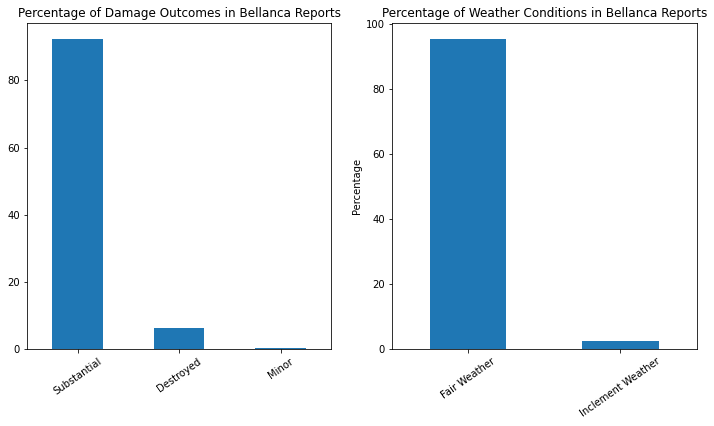

In [72]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
(bellanca["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', ax=ax[0],
            title="Percentage of Damage Outcomes in Bellanca Reports", rot=35)
(bellanca['weather_condition'].value_counts(normalize=True).drop(
    ["Unknown", "Unk"])*100).plot(kind='bar', ax=ax[1], 
    title="Percentage of Weather Conditions in Bellanca Reports", ylabel="Percentage");
ax[1].set_xticklabels(["Fair Weather", "Inclement Weather"], rotation=35);

### Fair Weather, Poor Weather Damage Categories, and Phase of Flight Breakdown

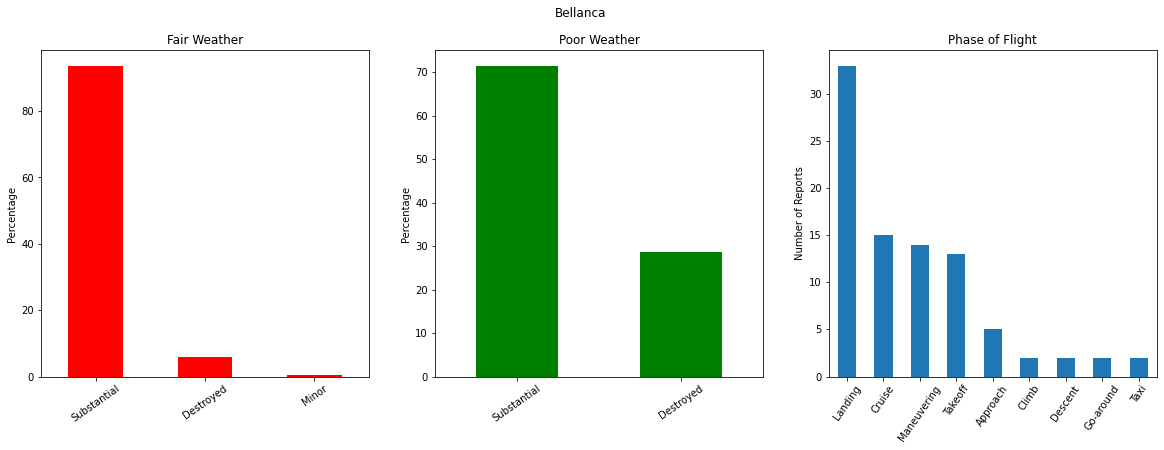

In [73]:
fig, ax = plt.subplots(ncols = 3, figsize= (20, 6))

(bellanca.loc[bellanca['weather_condition'] == "VMC"]['aircraft_damage'].value_counts(
    normalize=True)*100).plot(kind='bar', rot=35, ax=ax[0], color='red', 
    title="Fair Weather", ylabel="Percentage")

(bellanca.loc[bellanca['weather_condition'] == "IMC"]['aircraft_damage'].value_counts(
    normalize=True)*100).plot(kind='bar', 
    rot=35, color='green', ax=ax[1], title="Poor Weather", ylabel="Percentage")

bellanca['broad_phase_of_flight'].value_counts().drop('Unknown').plot(
    kind='bar', title="Phase of Flight", rot=55, ylabel="Number of Reports")
plt.suptitle("Bellanca");

## All Damage Outcomes, Grouped by Weather Nominally, then by Percentage

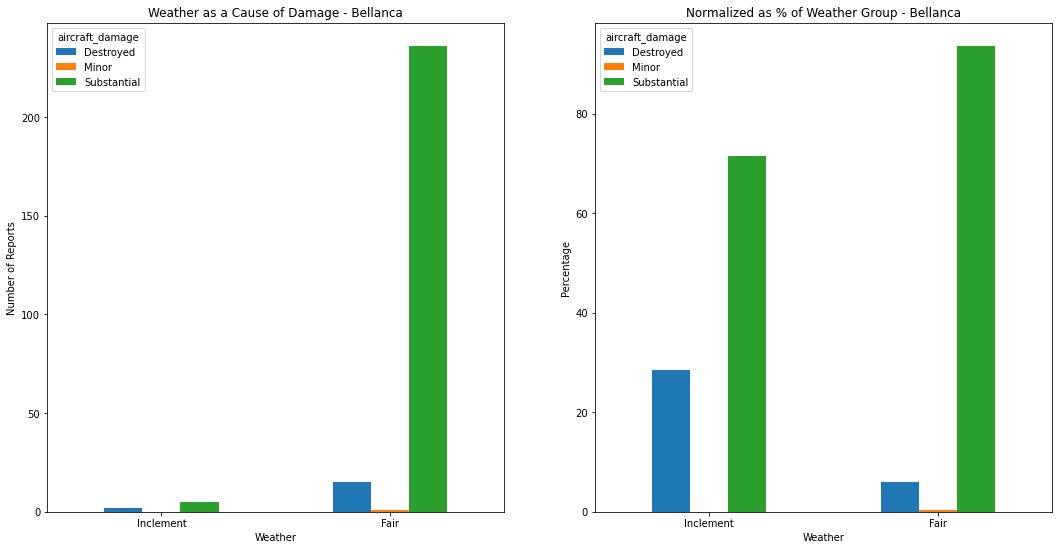

In [74]:
grouped_data = bellanca.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
grouped_data.drop(["Unknown"], axis=1, inplace=True)

fig, ax = plt.subplots(ncols=2, figsize=(18,9))
normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

grouped_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather", 
    title="Weather as a Cause of Damage - Bellanca", ax=ax[0], ylabel = "Number of Reports")
ax[0].set_xticklabels(["Inclement", "Fair"])

normalized_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized as % of Weather Group - Bellanca", ax=ax[1], ylabel="Percentage")
ax[1].set_xticklabels(["Inclement", "Fair"]);

# Maule

In [75]:
maule = top_ten_df[top_ten_df['make'] == "Maule"]

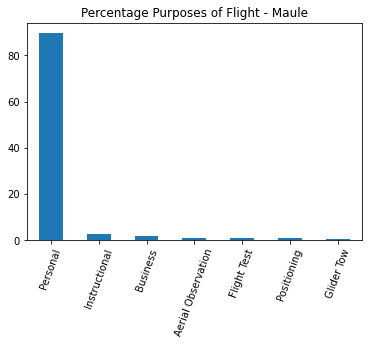

In [76]:
(maule['purpose_of_flight'].value_counts(normalize=True).drop('Unknown')[:10]*100).plot(
    kind='bar', title="Percentage Purposes of Flight - Maule", rot=70);

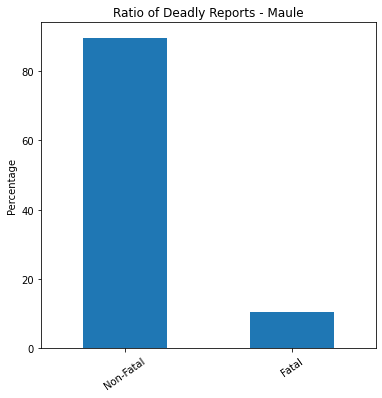

In [77]:
fig, ax = plt.subplots(figsize=(6,6))
(maule['injury_severity'].value_counts(normalize=True)*100).plot(
    kind='bar', title = 'Ratio of Deadly Reports - Maule', ylabel="Percentage", rot=35)
ax.set_xticklabels(["Non-Fatal", "Fatal"]);

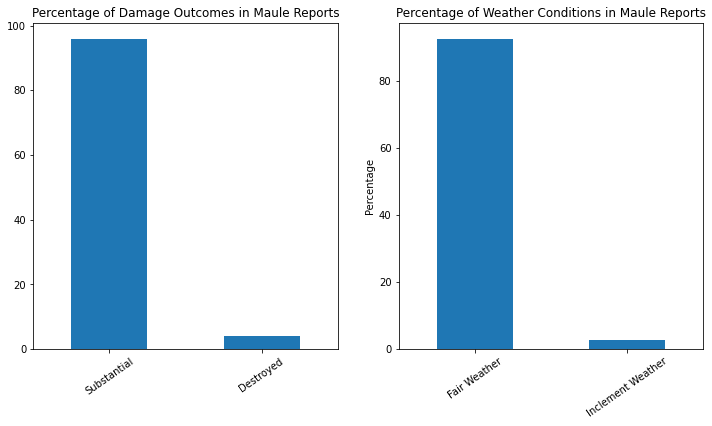

In [78]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
(maule["aircraft_damage"].value_counts(normalize=True)*100).plot(kind='bar', ax=ax[0],
            title="Percentage of Damage Outcomes in Maule Reports", rot=35)
(maule['weather_condition'].value_counts(normalize=True).drop(
    ["Unknown", "Unk"])*100).plot(kind='bar', ax=ax[1], 
    title="Percentage of Weather Conditions in Maule Reports", ylabel="Percentage");
ax[1].set_xticklabels(["Fair Weather", "Inclement Weather"], rotation=35);

### Fair Weather, Poor Weather Damage Categories, and Phase of Flight Breakdown

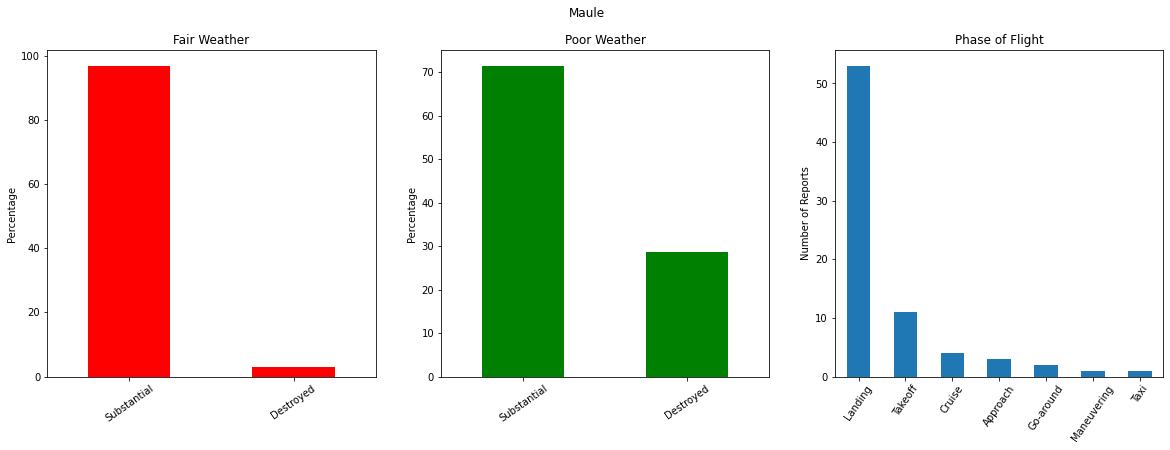

In [79]:
fig, ax = plt.subplots(ncols = 3, figsize= (20, 6))

(maule.loc[maule['weather_condition'] == "VMC"]['aircraft_damage'].value_counts(
    normalize=True)*100).plot(kind='bar', rot=35, ax=ax[0], color='red', 
    title="Fair Weather", ylabel="Percentage")

(maule.loc[maule['weather_condition'] == "IMC"]['aircraft_damage'].value_counts(
    normalize=True)*100).plot(kind='bar', 
    rot=35, color='green', ax=ax[1], title="Poor Weather", ylabel="Percentage")

maule['broad_phase_of_flight'].value_counts().drop('Unknown').plot(
    kind='bar', title="Phase of Flight", rot=55, ylabel="Number of Reports")
plt.suptitle("Maule");

## All Damage Outcomes, Grouped by Weather Nominally, then by Percentage

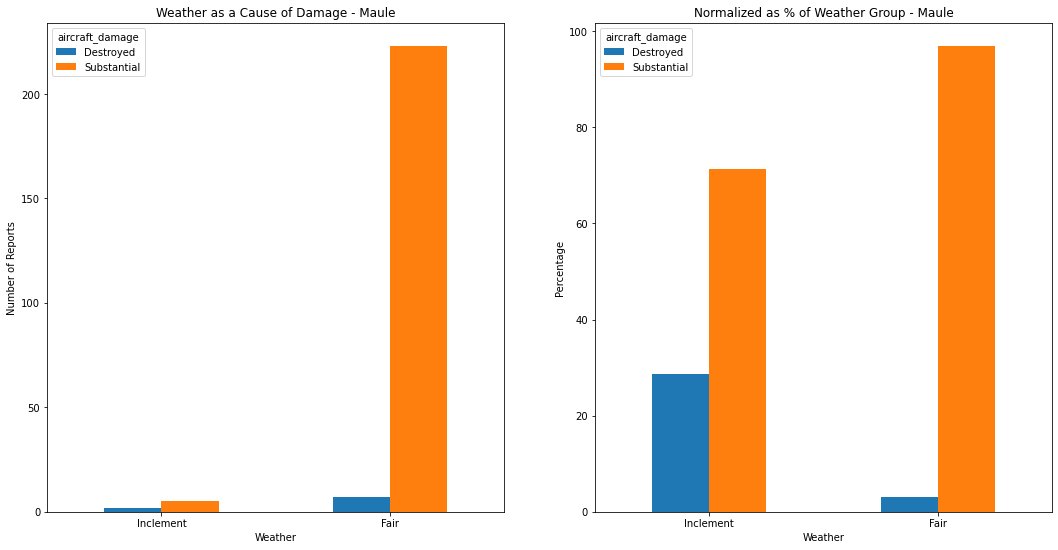

In [80]:
grouped_data = maule.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
#grouped_data.drop(["Unknown"], axis=1, inplace=True)

fig, ax = plt.subplots(ncols=2, figsize=(18,9))
normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

grouped_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather", 
    title="Weather as a Cause of Damage - Maule", ax=ax[0], ylabel = "Number of Reports")
ax[0].set_xticklabels(["Inclement", "Fair"])

normalized_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized as % of Weather Group - Maule", ax=ax[1], ylabel="Percentage")
ax[1].set_xticklabels(["Inclement", "Fair"]);

# Bell

In [81]:
bell = top_ten_df[top_ten_df['make'] == "Bell"]

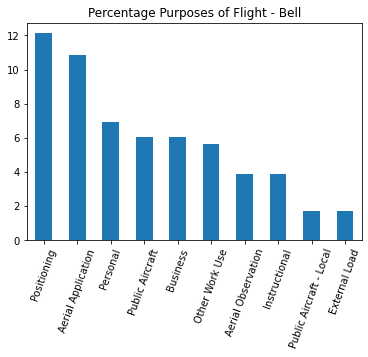

In [82]:
(bell['purpose_of_flight'].value_counts(normalize=True).drop("Unknown")[:10]*100).plot(
    kind='bar', title="Percentage Purposes of Flight - Bell", rot=70);

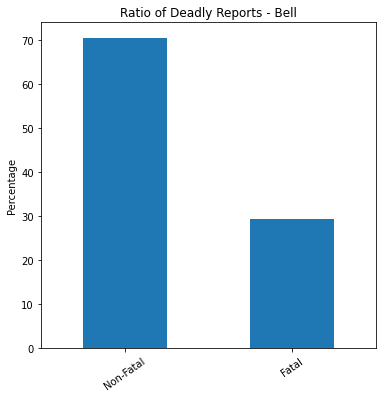

In [83]:
fig, ax = plt.subplots(figsize=(6,6))
(bell['injury_severity'].value_counts(normalize=True)*100).plot(
    kind='bar', title = 'Ratio of Deadly Reports - Bell', ylabel="Percentage", rot=35)
ax.set_xticklabels(["Non-Fatal", "Fatal"]);

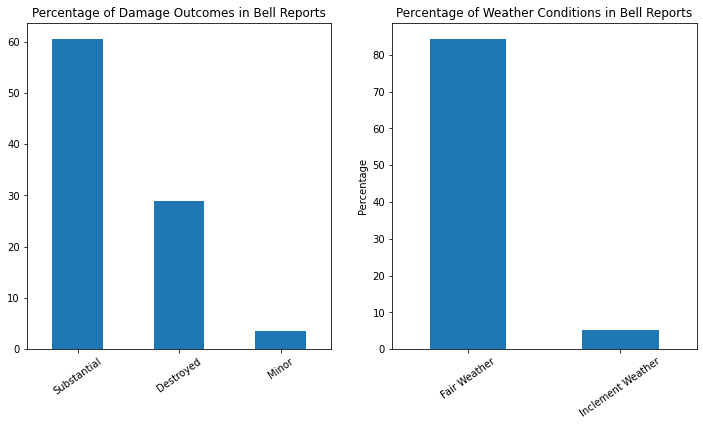

In [84]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
(bell["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', ax=ax[0],
            title="Percentage of Damage Outcomes in Bell Reports", rot=35)
(bell['weather_condition'].value_counts(normalize=True).drop("Unknown")*100).plot(
    kind='bar', ax=ax[1], title="Percentage of Weather Conditions in Bell Reports", 
    ylabel="Percentage");
ax[1].set_xticklabels(["Fair Weather", "Inclement Weather"], rotation=35);

### Fair Weather, Poor Weather Damage Categories, and Phase of Flight Breakdown

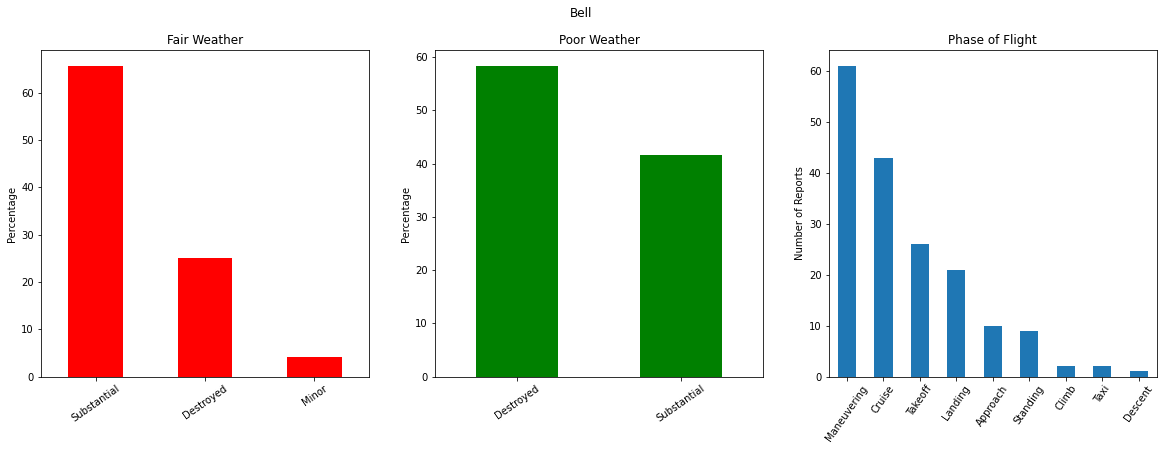

In [85]:
fig, ax = plt.subplots(ncols = 3, figsize= (20, 6))

(bell.loc[bell['weather_condition'] == "VMC"]['aircraft_damage'].value_counts(
    normalize=True).drop("Unknown")*100).plot(kind='bar', rot=35, ax=ax[0], color='red', 
    title="Fair Weather", ylabel="Percentage")

(bell.loc[bell['weather_condition'] == "IMC"]['aircraft_damage'].value_counts(
    normalize=True)*100).plot(kind='bar', 
    rot=35, color='green', ax=ax[1], title="Poor Weather", ylabel="Percentage")

bell['broad_phase_of_flight'].value_counts().drop('Unknown').plot(
    kind='bar', title="Phase of Flight", rot=55, ylabel="Number of Reports")
plt.suptitle("Bell");

## All Damage Outcomes, Grouped by Weather Nominally, then by Percentage

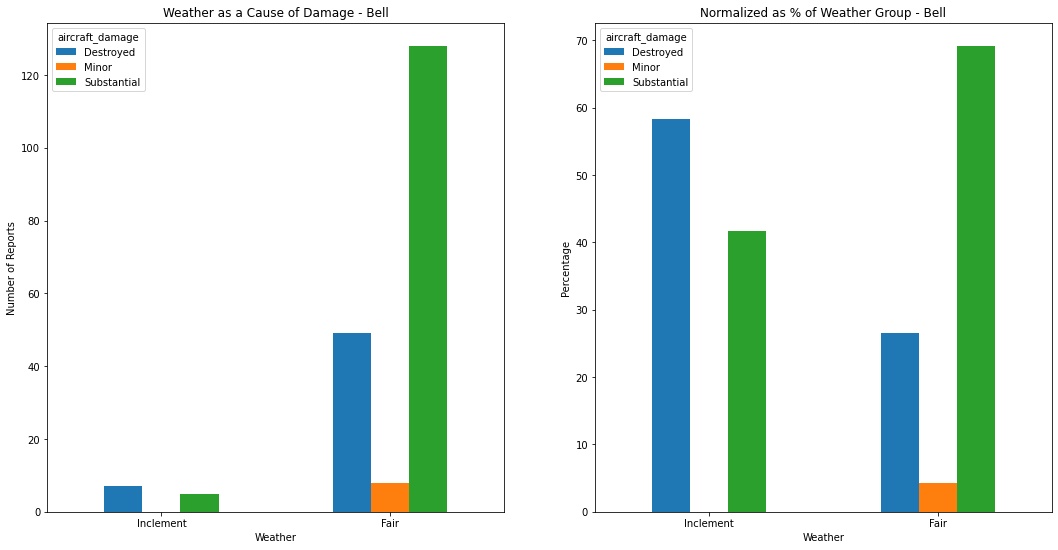

In [86]:
grouped_data = bell.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
grouped_data.drop(["Unknown"], axis=1, inplace=True)

fig, ax = plt.subplots(ncols=2, figsize=(18,9))
normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

grouped_data.drop("Unknown").plot(kind='bar', stacked=False, rot=0, xlabel="Weather", 
    title="Weather as a Cause of Damage - Bell", ax=ax[0], ylabel = "Number of Reports")
ax[0].set_xticklabels(["Inclement", "Fair"])

normalized_data.drop("Unknown").plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized as % of Weather Group - Bell", ax=ax[1], ylabel="Percentage")
ax[1].set_xticklabels(["Inclement", "Fair"]);

# END OF TOP 10 Charts

  
# Boeing vs Airbus

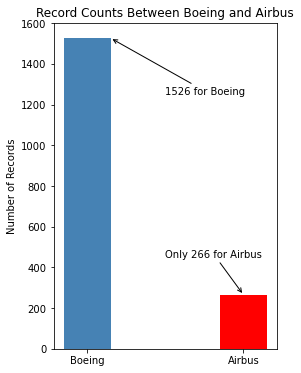

In [87]:
fig, ax = plt.subplots(figsize=(4,6))
ax.bar(["Boeing", "Airbus"], [len(boeing), len(airbus)], width=0.3, color=["steelblue", "red"]);
ax.set_ylabel("Number of Records")
plt.title("Record Counts Between Boeing and Airbus")
ax.annotate(text="Only 266 for Airbus", xy=(1, 266), 
        xytext=(0.5, 450), arrowprops=dict(arrowstyle='->'))
ax.annotate(text="1526 for Boeing", xy=(0.15, 1526), 
        xytext=(0.5, 1250), arrowprops=dict(arrowstyle='->'));

In [88]:
large_craft['injuries'] = large_craft['total_serious_injuries'] + large_craft['total_minor_injuries']

NameError: name 'large_craft' is not defined

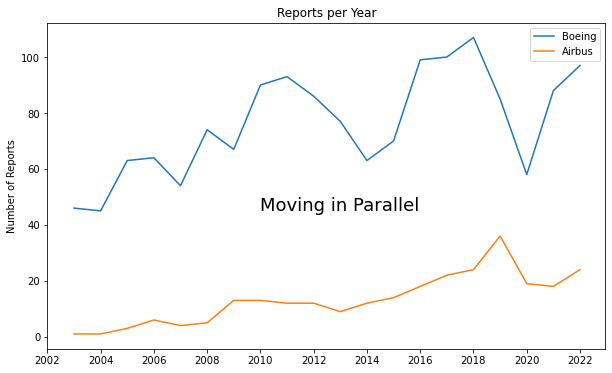

In [89]:
boe_trend = boeing.groupby('year')['investigation_type'].count()
air_trend = airbus.groupby('year')['investigation_type'].count()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(boe_trend.index, boe_trend)
ax.plot(air_trend.index, air_trend)
plt.legend(["Boeing", "Airbus"])
ax.set_title("Reports per Year")
ax.set_ylabel("Number of Reports")
ax.set_xticks(range(2002,2024,2))
ax.set_xticklabels(range(2002,2024,2))
ax.annotate(xy=(2010, 45), text="Moving in Parallel", fontsize=18);

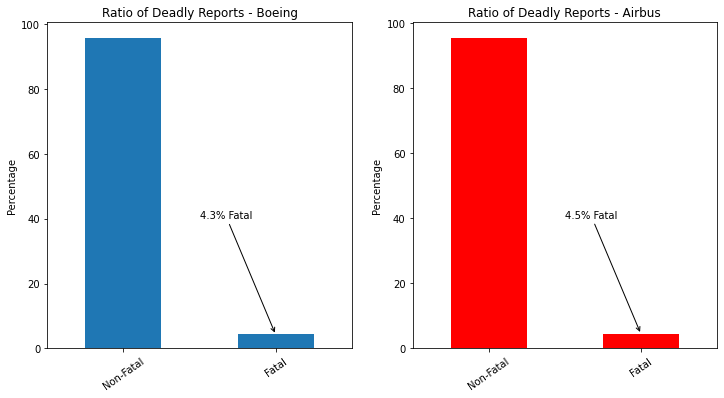

In [90]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
(boeing['injury_severity'].value_counts(normalize=True)*100).plot(ax=ax[0],
    kind='bar', title = 'Ratio of Deadly Reports - Boeing', ylabel="Percentage", rot=35)
ax[0].annotate(text="4.3% Fatal", xy=(1, 4.3), 
        xytext=(0.5, 40), arrowprops=dict(arrowstyle='->'))
ax[0].set_xticklabels(["Non-Fatal", "Fatal"])

(airbus['injury_severity'].value_counts(normalize=True)*100).plot(ax=ax[1], color='red',
    kind='bar', title = 'Ratio of Deadly Reports - Airbus', ylabel="Percentage", rot=35)
ax[1].set_xticklabels(["Non-Fatal", "Fatal"])
ax[1].annotate(text="4.5% Fatal", xy=(1, 4.5), 
        xytext=(0.5, 40), arrowprops=dict(arrowstyle='->'));

In [91]:
boeing["aircraft_damage"].value_counts(normalize=True)

Unknown        0.488860
Minor          0.244430
Substantial    0.226737
Destroyed      0.039974
Name: aircraft_damage, dtype: float64

In [92]:
airbus["aircraft_damage"].value_counts(normalize=True)

Unknown        0.639098
Minor          0.214286
Substantial    0.101504
Destroyed      0.045113
Name: aircraft_damage, dtype: float64

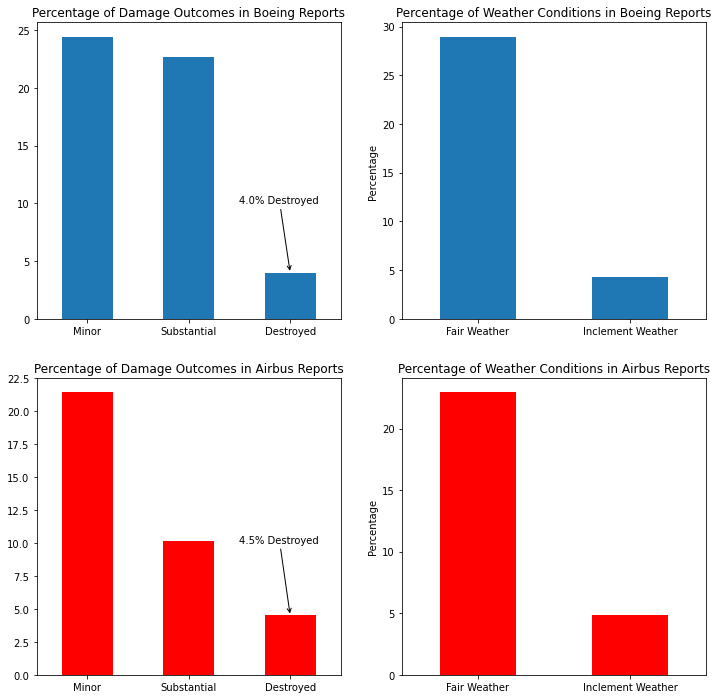

In [93]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,12))

(boeing["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', 
    ax=ax[0][0], title="Percentage of Damage Outcomes in Boeing Reports", rot=0)
(boeing['weather_condition'].value_counts(normalize=True).drop(
    ["Unknown", "Unk"])*100).plot(kind='bar', ax=ax[0][1], 
    title="Percentage of Weather Conditions in Boeing Reports", ylabel="Percentage")
ax[0][1].set_xticklabels(["Fair Weather", "Inclement Weather"], rotation=0)

(airbus["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', 
    ax=ax[1][0], title="Percentage of Damage Outcomes in Airbus Reports", rot=0, color='red')
(airbus['weather_condition'].value_counts(normalize=True).drop(
    ["Unknown", "Unk"])*100).plot(kind='bar', ax=ax[1][1], color='red',
    title="Percentage of Weather Conditions in Airbus Reports", ylabel="Percentage")
ax[1][1].set_xticklabels(["Fair Weather", "Inclement Weather"], rotation=0)

ax[0][0].annotate(text="4.0% Destroyed", xy=(2, 4.), 
        xytext=(1.5, 10), arrowprops=dict(arrowstyle='->'))

ax[1][0].annotate(text="4.5% Destroyed", xy=(2, 4.5), 
        xytext=(1.5, 10), arrowprops=dict(arrowstyle='->'));

### Lots of Unknown Weather Data

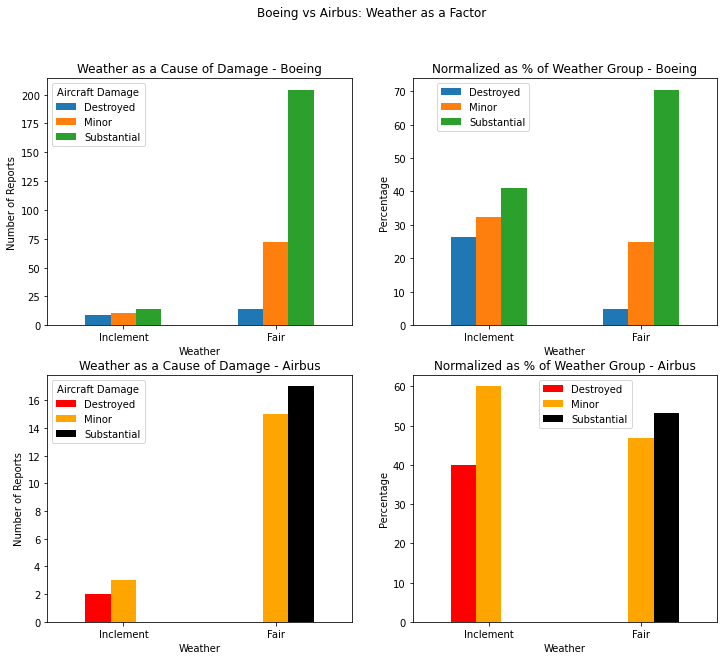

In [94]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))

boeing_grouped_data = boeing.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
boeing_grouped_data.drop(["Unknown"], axis=1, inplace=True)

boeing_normalized_data = boeing_grouped_data.div(boeing_grouped_data.sum(axis=1), axis=0) * 100

boeing_grouped_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather", 
    title="Weather as a Cause of Damage - Boeing", ax=ax[0][0], ylabel = "Number of Reports")
ax[0][0].set_xticklabels(["Inclement", "Fair"])
ax[0][0].legend_.set_title("Aircraft Damage")
boeing_normalized_data.drop(["Unknown", 'Unk']).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized as % of Weather Group - Boeing", ax=ax[0][1], ylabel="Percentage")
ax[0][1].set_xticklabels(["Inclement", "Fair"])
ax[0][1].legend_.set_title("Aircraft Damage")
ax[0][1].legend(bbox_to_anchor=(0.4, 1))
ab_grouped_data = airbus.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
ab_grouped_data.drop(["Unknown"], axis=1, inplace=True)

ab_normalized_data = ab_grouped_data.div(ab_grouped_data.sum(axis=1), axis=0) * 100

ab_grouped_data.drop(["Unknown", "Unk"]).plot(kind='bar', stacked=False, rot=0, xlabel="Weather", 
    title="Weather as a Cause of Damage - Airbus", ax=ax[1][0], 
    ylabel = "Number of Reports", color=["red", "orange", 'black', 'turquoise'])
ax[1][0].set_xticklabels(["Inclement", "Fair"])
ax[1][0].legend_.set_title("Aircraft Damage")
ab_normalized_data.drop(["Unknown", 'Unk']).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized as % of Weather Group - Airbus", ax=ax[1][1], 
    ylabel="Percentage", color=["red", "orange", 'black', 'turquoise'])
ax[1][1].set_xticklabels(["Inclement", "Fair"])
ax[1][1].legend_.set_title("Aircraft Damage")
ax[1][1].legend(bbox_to_anchor=(0.4, 1))
fig.suptitle("Boeing vs Airbus: Weather as a Factor");

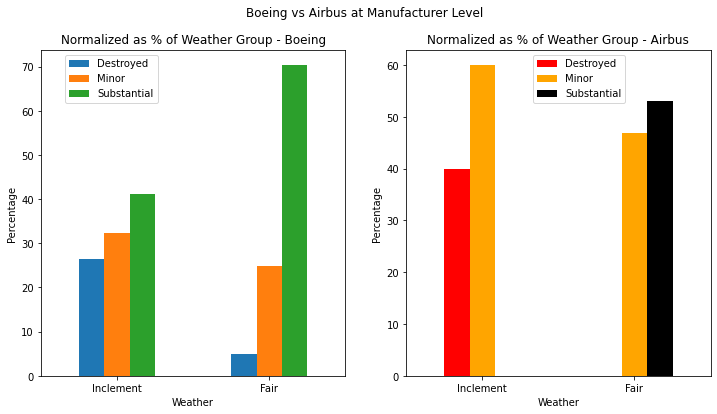

In [372]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))

boeing_normalized_data.drop(["Unknown", 'Unk']).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized as % of Weather Group - Boeing", ax=ax[0], ylabel="Percentage")
ax[0].set_xticklabels(["Inclement", "Fair"])
ax[0].legend_.set_title("Aircraft Damage")
ax[0].legend(bbox_to_anchor=(0.4, 1))

ab_normalized_data.drop(["Unknown", 'Unk']).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized as % of Weather Group - Airbus", ax=ax[1], 
    ylabel="Percentage", color=["red", "orange", 'black', 'turquoise'])
ax[1].set_xticklabels(["Inclement", "Fair"])
ax[1].legend_.set_title("Aircraft Damage")
ax[1].legend(bbox_to_anchor=(0.4, 1))
plt.suptitle("Boeing vs Airbus at Manufacturer Level")
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/boeing_v_airbus.jpg');

# Major Takeaway here is that the Unknown values for Airbus make its data very unreliable

# Air Tractor vs Grumman - Work Planes

## df[df['make']] == "Grumman" -- so no excessive filtering of either manufacturer

In [95]:
print(len(grumman), len(air_tractor))

187 287


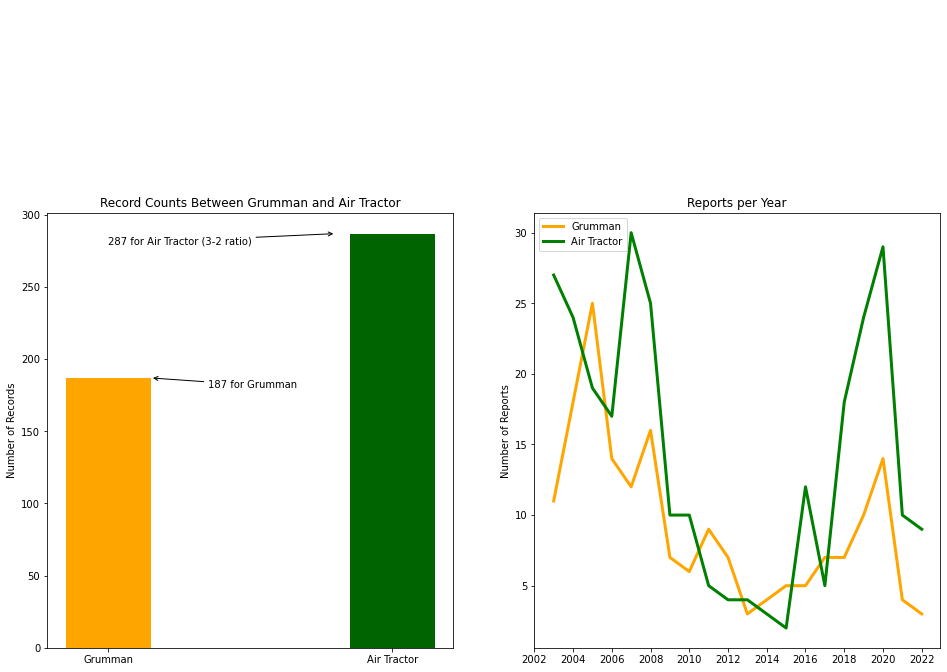

In [113]:
fig, ax = plt.subplots(ncols=2, figsize=(16,8))
ax[0].bar(["Grumman", "Air Tractor"], [len(grumman), len(air_tractor)], width=0.3, color=["orange", "darkgreen"]);
ax[0].set_ylabel("Number of Records")
ax[0].set_title("Record Counts Between Grumman and Air Tractor")
ax[0].annotate(text="287 for Air Tractor (3-2 ratio)", xy=(.8, 287), 
        xytext=(-.0, 280), arrowprops=dict(arrowstyle='->'))
ax[0].annotate(text="187 for Grumman", xy=(0.15, 187), 
        xytext=(0.35, 180), arrowprops=dict(arrowstyle='->'))

gru_trend = grumman.groupby('year')['investigation_type'].count()
atract_trend = air_tractor.groupby('year')['investigation_type'].count()

ax[1].plot(gru_trend.index, gru_trend, linewidth=3, color='orange')
ax[1].plot(atract_trend.index, atract_trend, color='green', linewidth=3)
plt.legend(["Grumman", "Air Tractor"])
ax[1].set_title("Reports per Year")
ax[1].set_ylabel("Number of Reports")
ax[1].set_xticks(range(2002,2024,2))
ax[1].set_xticklabels(range(2002,2024,2))
ax[1].annotate(xy=(2010, 45), text="Moving in Parallel", fontsize=18);

## 3 to 2 more Air Tractor Reports

In [97]:
grumman['injury_severity'].value_counts(normalize=True)*100

non-fatal    82.352941
fatal        17.647059
Name: injury_severity, dtype: float64

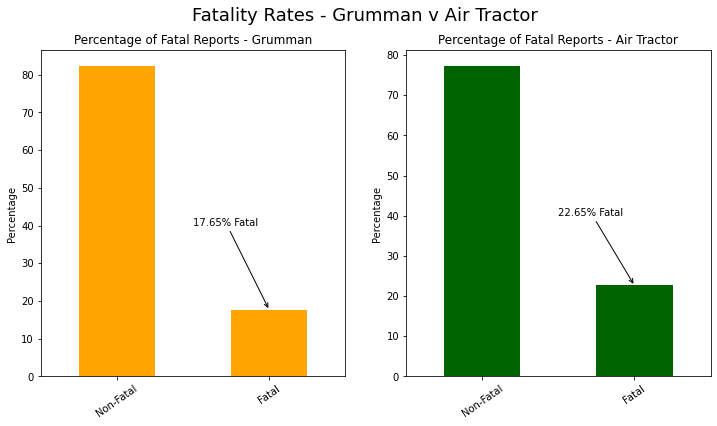

In [373]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
(grumman['injury_severity'].value_counts(normalize=True)*100).plot(ax=ax[0], color='orange',
    kind='bar', title = 'Percentage of Fatal Reports - Grumman', ylabel="Percentage", rot=35)
ax[0].annotate(text="17.65% Fatal", xy=(1, 17.65), 
        xytext=(0.5, 40), arrowprops=dict(arrowstyle='->'))
ax[0].set_xticklabels(["Non-Fatal", "Fatal"])

(air_tractor['injury_severity'].value_counts(normalize=True)*100).plot(ax=ax[1], color='darkgreen',
    kind='bar', title = 'Percentage of Fatal Reports - Air Tractor', ylabel="Percentage", rot=35)
ax[1].set_xticklabels(["Non-Fatal", "Fatal"])
ax[1].annotate(text="20.8% Fatal", xy=(1, 20.8), 
        xytext=(0.5, 40), arrowprops=dict(arrowstyle='->'))
plt.suptitle("Fatality Rates - Grumman v Air Tractor", fontsize=18)
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/Grumman_v_AT_fatality.jpg', bbox_inches='tight', pad_inches=0.4);

## Grumman definitely fewer deadly flights by percentage

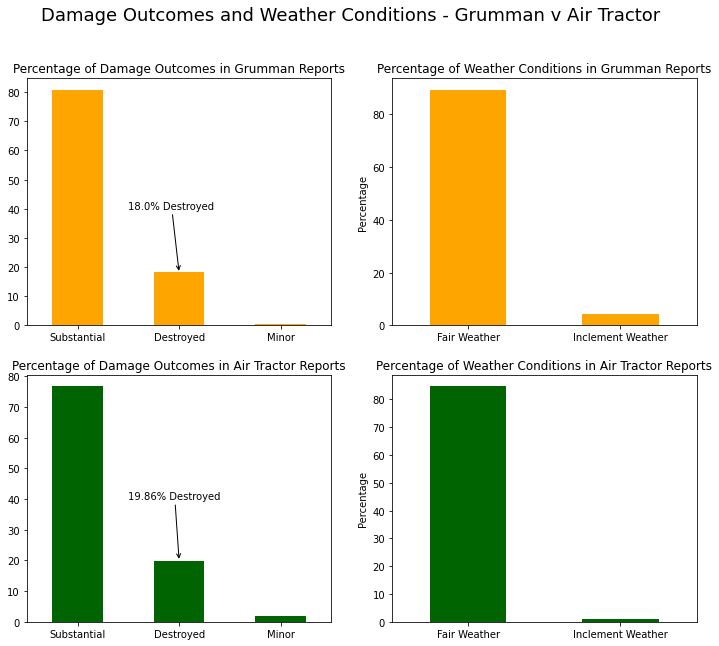

In [126]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))

(grumman["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', 
    ax=ax[0][0], title="Percentage of Damage Outcomes in Grumman Reports", rot=0, color='orange')
(grumman['weather_condition'].value_counts(normalize=True).drop(
    "Unknown")*100).plot(kind='bar', ax=ax[0][1], color='orange',
    title="Percentage of Weather Conditions in Grumman Reports", ylabel="Percentage")
ax[0][1].set_xticklabels(["Fair Weather", "Inclement Weather"], rotation=0)

(air_tractor["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', 
    ax=ax[1][0], title="Percentage of Damage Outcomes in Air Tractor Reports", rot=0, color='darkgreen')
(air_tractor['weather_condition'].value_counts(normalize=True).drop(
    ["Unknown", "Unk"])*100).plot(kind='bar', ax=ax[1][1], color='darkgreen',
    title="Percentage of Weather Conditions in Air Tractor Reports", ylabel="Percentage")
ax[1][1].set_xticklabels(["Fair Weather", "Inclement Weather"], rotation=0)

ax[0][0].annotate(text="18.0% Destroyed", xy=(1, 18.), 
        xytext=(.5, 40), arrowprops=dict(arrowstyle='->'))

ax[1][0].annotate(text="19.86% Destroyed", xy=(1, 19.86), 
        xytext=(.5, 40), arrowprops=dict(arrowstyle='->'))
plt.suptitle("Damage Outcomes and Weather Conditions - Grumman v Air Tractor", fontsize=18)
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/Grumman_v_AT_dmg_weather.jpg');

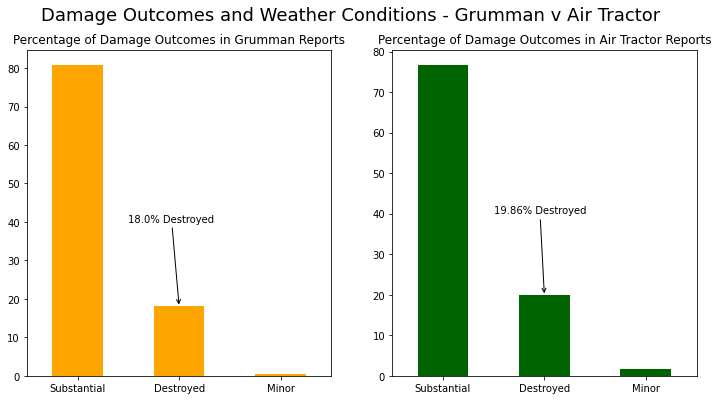

In [335]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))

(grumman["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', 
    ax=ax[0], title="Percentage of Damage Outcomes in Grumman Reports", rot=0, color='orange')

(air_tractor["aircraft_damage"].value_counts(normalize=True).drop("Unknown")*100).plot(kind='bar', 
    ax=ax[1], title="Percentage of Damage Outcomes in Air Tractor Reports", rot=0, color='darkgreen')

ax[0].annotate(text="18.0% Destroyed", xy=(1, 18.), 
        xytext=(.5, 40), arrowprops=dict(arrowstyle='->'))

ax[1].annotate(text="19.86% Destroyed", xy=(1, 19.86), 
        xytext=(.5, 40), arrowprops=dict(arrowstyle='->'))
plt.suptitle("Damage Outcomes and Weather Conditions - Grumman v Air Tractor", fontsize=18)
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/Grumman_v_AT_dmg_weather_smaller.jpg');

## Grumman also less likely to be destroyed in reports

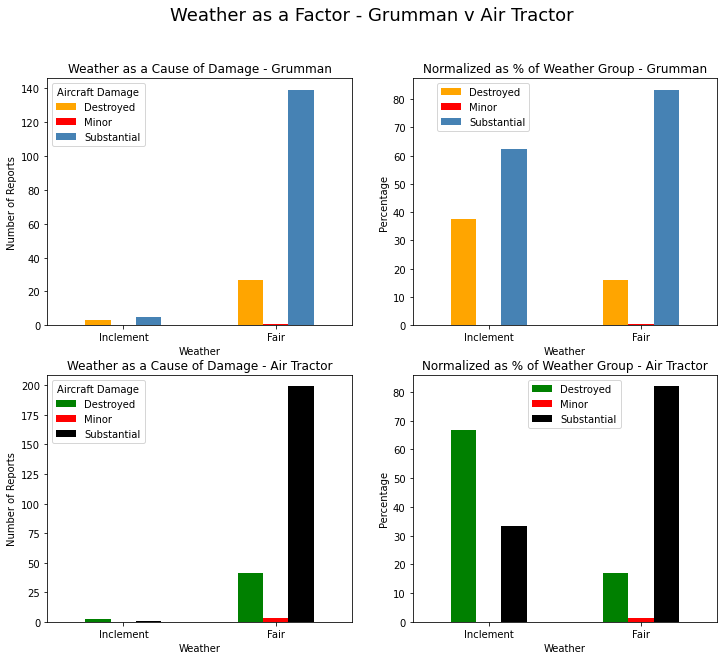

In [142]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))

grumman_grouped_data = grumman.groupby(['weather_condition', 'aircraft_damage']).size().unstack()

grumman_grouped_data.drop(["Unknown"], axis=1, inplace=True)

grumman_normalized_data = grumman_grouped_data.div(grumman_grouped_data.sum(axis=1), axis=0) * 100

grumman_grouped_data.drop("Unknown").plot(kind='bar', stacked=False, rot=0, xlabel="Weather", 
    title="Weather as a Cause of Damage - Grumman", ax=ax[0][0], ylabel = "Number of Reports",  
    color=["orange", "red", 'steelblue', 'turquoise'])
ax[0][0].set_xticklabels(["Inclement", "Fair"])
ax[0][0].legend_.set_title("Aircraft Damage")
grumman_normalized_data.drop("Unknown").plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized as % of Weather Group - Grumman", ax=ax[0][1], ylabel="Percentage",
     color=["orange", "red", 'steelblue', 'turquoise'])

ax[0][1].set_xticklabels(["Inclement", "Fair"])
ax[0][1].legend_.set_title("Aircraft Damage")
ax[0][1].legend(bbox_to_anchor=(0.4, 1))

at_grouped_data = air_tractor.groupby(['weather_condition', 'aircraft_damage']).size().unstack()
at_grouped_data.drop(["Unknown"], axis=1, inplace=True)

at_normalized_data = at_grouped_data.div(at_grouped_data.sum(axis=1), axis=0) * 100

at_grouped_data.drop(["Unknown", 'Unk']).plot(kind='bar', stacked=False, rot=0, xlabel="Weather", 
    title="Weather as a Cause of Damage - Air Tractor", ax=ax[1][0], 
    ylabel = "Number of Reports", color=["green", "red", 'black', 'yellow'])
ax[1][0].set_xticklabels(["Inclement", "Fair"])
ax[1][0].legend_.set_title("Aircraft Damage")
at_normalized_data.drop(["Unknown", 'Unk']).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized as % of Weather Group - Air Tractor", ax=ax[1][1], 
    ylabel="Percentage", color=["green", "red", 'black', 'yellow'])
ax[1][1].set_xticklabels(["Inclement", "Fair"])
ax[1][1].legend_.set_title("Aircraft Damage")
ax[1][1].legend(bbox_to_anchor=(0.7, 1))
fig.suptitle("Weather as a Factor - Grumman v Air Tractor", fontsize=18)
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/Grumman_v_AT_weather.jpg');

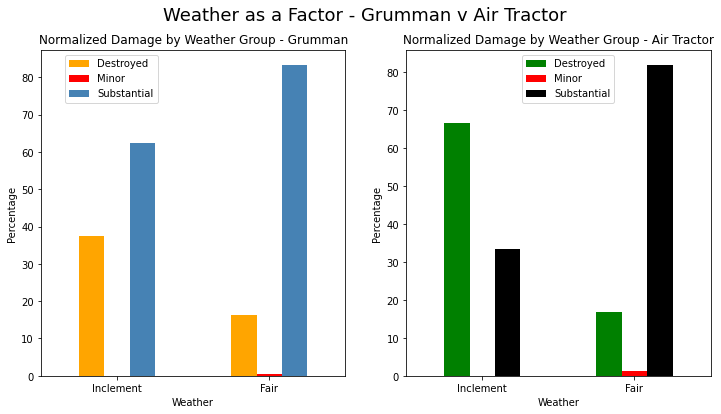

In [380]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))

grumman_normalized_data.drop("Unknown").plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized Damage by Weather Group - Grumman", ax=ax[0], ylabel="Percentage",
     color=["orange", "red", 'steelblue', 'turquoise'])

ax[0].set_xticklabels(["Inclement", "Fair"])
ax[0].legend_.set_title("Aircraft Damage")
ax[0].legend(bbox_to_anchor=(0.4, 1))

at_normalized_data.drop(["Unknown", 'Unk']).plot(kind='bar', stacked=False, rot=0, xlabel="Weather",
    title="Normalized Damage by Weather Group - Air Tractor", ax=ax[1], 
    ylabel="Percentage", color=["green", "red", 'black', 'yellow'])
ax[1].set_xticklabels(["Inclement", "Fair"])
ax[1].legend_.set_title("Aircraft Damage")
ax[1].legend(bbox_to_anchor=(0.7, 1))
plt.suptitle("Weather as a Factor - Grumman v Air Tractor", fontsize=18)
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/Grumman_v_AT_weather_last.jpg');

# Consolidations!!!

In [143]:
# piper.loc[(piper['model'].str.contains('36') == True) & (piper['purpose_of_flight'] == "Unknown")]

In [144]:
# cessna[cessna['model'].str.contains('188')][25:35]  #159

In [202]:
df[df['make']=="Grumman"]['model'].str.contains("164").value_counts()

True     124
False     63
Name: model, dtype: int64

In [201]:
grumman['model'].str.contains("164").value_counts()

True     124
False     63
Name: model, dtype: int64

# Air Tractor Model Consolidation

# Cessna Model Consolidation

# Piper Model Consolidation

In [145]:
df.head(2)

,investigation_type,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,state
0,Accident,"TUCSON, AZ",United States,fatal,Destroyed,Unknown,Beech,95,2,Reciprocating,Personal,1,3,0,0,VMC,Takeoff,2003,AZ
1,Accident,"Milford, UT",United States,non-fatal,Destroyed,Unknown,Aircraft Mfg & Dev. Co. (Amd),Ch2000,1,Reciprocating,Instructional,0,2,0,0,VMC,Cruise,2003,UT


# New DF CREATION!

In [5]:
work_planes = df.loc[(df['purpose_of_flight'] == "Aerial Application") | (df['purpose_of_flight'] == "Unknown")]

In [6]:
work_planes[work_planes['make'] == "Grumman"]['model'].str.contains("164").value_counts()

True     114
False     13
Name: model, dtype: int64

In [7]:
work_planes.head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,state,make_model
53989,Accident,2003-01-03,"IMMOKALEE, FL",United States,non-fatal,Substantial,Unknown,Mielec,PzlM18,1,Turbo Prop,Aerial Application,0,0,0,1,VMC,Cruise,2003,FL,Mielec PzlM18
53998,Incident,2003-01-04,"Telluride, CO",United States,non-fatal,Minor,Unknown,Hawker Siddeley,Hs125700A,2,Turbo Fan,Unknown,0,0,0,6,VMC,Standing,2003,CO,Hawker Siddeley Hs125700A
54001,Accident,2003-01-06,"CLEVELAND, OH",United States,non-fatal,Substantial,Unknown,Embraer,Erj145Lr,2,Turbo Fan,Unknown,0,0,0,50,IMC,Landing,2003,OH,Embraer Erj145Lr
54005,Accident,2003-01-08,"MEDFORD, OR",United States,non-fatal,Substantial,Unknown,Bombardier,Dhc8401,2,Turbo Prop,Unknown,0,1,0,31,VMC,Approach,2003,OR,Bombardier Dhc8401
54014,Accident,2003-01-08,"Diyarbakir, Turkey",Turkey,fatal,Destroyed,Unknown,British Aerospace,Rj100,0,Unknown,Unknown,75,5,0,0,Unknown,Unknown,2003,ey,British Aerospace Rj100


# BIG EDIT OF PLANE MODELS!!!!


In [8]:
work_planes['make'] = work_planes['make'].map(lambda x: "Cessna" if "Cessna" in x else x)

<ipython-input-8-accd7481eb93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_planes['make'] = work_planes['make'].map(lambda x: "Cessna" if "Cessna" in x else x)


In [9]:
work_planes.loc[(work_planes['make'] == "Cessna") & (work_planes['model'].str.contains("188")), 'model'].unique()

array(['A188A', 'A188B', '188A', 'T188C', '188B', '188', 'A188',
       '188  Undesignat', 'T188'], dtype=object)

In [10]:
work_planes.loc[work_planes['make'] == "Cessna"]["model"].unique()[:10]

array(['411', 'A188A', '551 (Citation Ii)', '207A', '402C', '208B',
       '421C', '206', 'Conquest', 'R172Hp'], dtype=object)

In [11]:
# Big Edit Cell
work_planes.loc[work_planes['make'] == "Cessna", 'model'] = work_planes.loc[
    (work_planes['make'] == "Cessna", 'model')].map(lambda x: "188" if "188" in x else x).copy()

/Users/samalainabayeva/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [12]:
work_planes.loc[(work_planes['make'] == "Cessna") & (work_planes['model'].str.contains("188")), 'model'].value_counts()

188    136
Name: model, dtype: int64

# Cessna Perfect Clean

In [13]:
work_planes.loc[(work_planes['make'] == "Piper") & (work_planes['model'].str.contains("36") == True), 'model'].unique()

array(['Pa36375', 'Pa36300', 'Pa36285', 'Pa36', 'Pa 36285'], dtype=object)

In [14]:
work_planes.loc[(work_planes['make'] == "Piper") & (work_planes['model'].str.contains("25") == True), 'model'].unique()

array(['Pa23250', 'Pa25235', 'Pa25', 'Pa25260', 'Pa31325', 'Pa 25235',
       'Pa 25260', 'Pa 25', 'Pa24250', 'Pa25235D', '25260'], dtype=object)

In [15]:
work_planes.loc[work_planes["make"] == "Piper", 'model'] = work_planes.loc[work_planes["make"] == "Piper", 'model'].map(
    lambda x: "36" if "36" in x else x)

# work_planes.loc[work_planes['make'] == "Piper", 'model'] = work_planes.loc[
#     (work_planes['make'] == "Piper") & (work_planes['model'].str.contains("36")), 'model'].map(lambda x: "36" if "36" in x else x)

/Users/samalainabayeva/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [16]:
work_planes.loc[(work_planes['make'] == "Piper") & (work_planes['model'].str.contains("36") == True), 'model'].unique()

array(['36'], dtype=object)

In [17]:
work_planes.loc[(work_planes['make'] == "Piper"), 'model']

54163      Pa31350
54176      Pa31350
54330         Pa31
54417           36
54482      Pa32300
           ...    
90251      Pa28181
90265      Pa31350
90328         Pa42
90329      Pa38112
90331    Pa 46350P
Name: model, Length: 512, dtype: object

In [18]:
work_planes.loc[work_planes['make'] == "Piper", 'model'] = work_planes.loc[
    work_planes['make'] == "Piper", 'model'].map(lambda x: "25" if "25" in x else x)

/Users/samalainabayeva/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [19]:
work_planes.loc[(work_planes['make'] == "Piper") & (work_planes['model'].str.contains("36")), 'model'].unique()

array(['36'], dtype=object)

In [20]:
work_planes.loc[(work_planes['make'] == "Piper") & (work_planes['model'].str.contains("25") == True), 'model'].unique()

array(['25'], dtype=object)

In [21]:
#work_planes.loc[(work_planes['make'] == "Piper") & (work_planes['model'].str.contains("36")), 'model']

In [22]:
work_planes.loc[work_planes['make'] == "Piper"]['model'].value_counts()

25            101
Pa31350        50
Pa28           38
36             28
Pa34           26
             ... 
Pa46  350P      1
Pa38112         1
Pa 28180        1
Pa31P           1
Pa 31T  Ii      1
Name: model, Length: 95, dtype: int64

In [23]:
work_planes.loc[work_planes['make'] == "Air Tractor", 'model'].unique()

array(['At401', 'At502B', 'At 401', '502', '502B', 'At402B', 'At301',
       'At502', 'At602', 'At502A', 'At802A', '402A', 'At401B', 'At802',
       'At402', 'At400', 'At402A', '502A', 'At400A', '301', 'At 602',
       '402B', '4010860', 'At301A', 'At301B', 'At503', 'At 802',
       'At 402B', 'At 502', 'At 502B', 'At 301', 'At 802A', 'At 401B',
       'At 402A', 'At 402', 'At', 'At 400', '401B', 'At 400A', 'At802F'],
      dtype=object)

In [24]:
work_planes.loc[work_planes['make'] == "Air Tractor", 'model'] = work_planes.loc[
    work_planes['make'] == "Air Tractor", 'model'].map(lambda x: "802" if "802" in x else x)

/Users/samalainabayeva/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [25]:
work_planes.loc[work_planes['make'] == "Air Tractor", 'model'] = work_planes.loc[
    work_planes['make'] == "Air Tractor", 'model'].map(lambda x: "502" if "502" in x else x)

In [26]:
work_planes.loc[work_planes['make'] == "Air Tractor", 'model'] = work_planes.loc[
    work_planes['make'] == "Air Tractor", 'model'].map(lambda x: "602" if "602" in x else x)

In [27]:
work_planes.loc[work_planes['make'] == "Air Tractor", 'model'] = work_planes.loc[
    work_planes['make'] == "Air Tractor", 'model'].map(lambda x: "301" if "301" in x else x)

In [28]:
work_planes.loc[work_planes['make'] == "Air Tractor", 'model'] = work_planes.loc[
    work_planes['make'] == "Air Tractor", 'model'].map(lambda x: "402" if "402" in x else x)

In [29]:
work_planes.loc[work_planes['make'] == "Air Tractor", 'model'].unique()

array(['At401', '502', 'At 401', '402', '301', '602', '802', 'At401B',
       'At400', 'At400A', '4010860', 'At503', 'At 401B', 'At', 'At 400',
       '401B', 'At 400A'], dtype=object)

In [30]:
work_planes[work_planes['make'] == "Grumman"]['model'].str.contains("164").value_counts()

True     114
False     13
Name: model, dtype: int64

In [31]:
work_planes.loc[work_planes['make'] == "Grumman", 'model'] = work_planes.loc[
    work_planes['make'] == "Grumman", 'model'].map(lambda x: "164" if "164" in x else x)

In [32]:
work_planes[work_planes['make'] == "Grumman"]['model'].value_counts()

164     114
G21A      3
Aa1       3
Aa5       3
G44       1
Aa5B      1
G73T      1
G21       1
Name: model, dtype: int64

In [33]:
work_planes[work_planes['purpose_of_flight'] != "Unknown"]['make'].value_counts()[:10]

Air Tractor               411
Cessna                    124
Grumman                   113
Piper                      85
Ayres                      65
Grumman Acft               54
Ayres Corporation          42
Rockwell International     27
Bell                       25
Weatherly                  22
Name: make, dtype: int64

# At this point, i want to consolidate the MAKE column for shared names.

In [34]:
work_planes['make'] = work_planes['make'].map(lambda x: "Air Tractor" if "Air Tractor" in x else x)

<ipython-input-34-5e0377cad642>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_planes['make'] = work_planes['make'].map(lambda x: "Air Tractor" if "Air Tractor" in x else x)


In [35]:
work_planes['make'] = work_planes['make'].map(lambda x: "Cessna" if "Cessna" in x else x)

<ipython-input-35-accd7481eb93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_planes['make'] = work_planes['make'].map(lambda x: "Cessna" if "Cessna" in x else x)


In [36]:
work_planes['make'] = work_planes['make'].map(lambda x: "Grumman" if "Grumman" in x else x)

<ipython-input-36-bf90736e7a29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_planes['make'] = work_planes['make'].map(lambda x: "Grumman" if "Grumman" in x else x)


In [37]:
work_planes['make'] = work_planes['make'].map(lambda x: "Piper" if "Piper" in x else x)

<ipython-input-37-778095098c3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_planes['make'] = work_planes['make'].map(lambda x: "Piper" if "Piper" in x else x)


In [38]:
work_planes['make'] = work_planes['make'].map(lambda x: "Ayres" if "Ayres" in x else x)

<ipython-input-38-457206c46db1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_planes['make'] = work_planes['make'].map(lambda x: "Ayres" if "Ayres" in x else x)


# Top Five Brands have been filtered!!!!!!!!!

In [39]:
plane_list = ["Grumman", "Piper", "Ayres", "Cessna", "Air Tractor"]

In [40]:
aerial_application = work_planes.loc[work_planes['make'].isin(plane_list)]

In [41]:
aerial_application.loc[aerial_application['make']=="Grumman"]['model'].value_counts()

164       114
G164B      37
G164A      19
G 164B      8
G 164A      6
G164        5
Aa5         4
G21A        3
Aa1         3
G 164       3
G164C       3
Aa5B        1
G73T        1
G21         1
G44         1
G73         1
Name: model, dtype: int64

# Did this out of order, skewed what appeared to be our sample size!

In [42]:
aerial_application.loc[aerial_application['make'] == "Grumman", 'model'] = aerial_application.loc[
    aerial_application['make'] == "Grumman", 'model'].map(lambda x: "164" if "164" in x else x)

In [43]:
aerial_application.loc[aerial_application['make']=="Grumman"]['model'].value_counts()

164     195
Aa5       4
G21A      3
Aa1       3
G73T      1
G21       1
G44       1
Aa5B      1
G73       1
Name: model, dtype: int64

# -----------

#     

# FILTERED AERIAL DF CREATION FOR TOP 5 MANUFACTURERS!!!!

In [44]:
aerial_application.head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,state,make_model
54044,Accident,2003-01-14,"CIUDAD DEL ESTE, PARAGUAY",Paraguay,non-fatal,Substantial,Unknown,Cessna,411,0,Unknown,Unknown,0,0,0,6,VMC,Unknown,2003,AY,Cessna 411
54045,Accident,2003-01-14,"ALAMO, TX",United States,non-fatal,Substantial,Unknown,Air Tractor,At401,1,Reciprocating,Aerial Application,0,1,0,0,VMC,Maneuvering,2003,TX,Air Tractor At401
54048,Accident,2003-01-15,"BRAWLEY, CA",United States,non-fatal,Substantial,Unknown,Cessna,188,1,Reciprocating,Aerial Application,0,0,0,1,VMC,Takeoff,2003,CA,Cessna A188A
54072,Accident,2003-01-20,"PERIGUEUX, FRANCE",France,non-fatal,Substantial,Unknown,Cessna,551 (Citation Ii),0,Unknown,Unknown,0,0,0,4,Unknown,Unknown,2003,CE,Cessna 551 (Citation Ii)
54073,Accident,2003-01-20,"PUT IN BAY, OH",United States,non-fatal,Substantial,Unknown,Cessna,207A,1,Reciprocating,Unknown,0,0,2,1,VMC,Takeoff,2003,OH,Cessna 207A


In [45]:
makes = ["Grumman", "Air Tractor", "Cessna", "Piper"]
models = ["188", "25", "36", "502", "301", "602", "802", "164"]

In [46]:
aerial_application[aerial_application['make']=="Grumman"]['model'].value_counts()[:3]

164     195
Aa5       4
G21A      3
Name: model, dtype: int64

In [47]:
filtered_aerial = aerial_application.loc[(aerial_application['make'].isin(
    makes) == True) & (aerial_application['model'].isin(models) == True)]

In [48]:
filtered_aerial[filtered_aerial['make'] == "Grumman"]['model'].value_counts()

164    195
Name: model, dtype: int64

# Ces=136, Pip=129, AT= 189, GR=194

In [49]:
filtered_aerial.loc[filtered_aerial['make'] == "Piper"]['model'].value_counts()

25    101
36     28
Name: model, dtype: int64

In [50]:
filtered_aerial.head(2)

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,state,make_model
54048,Accident,2003-01-15,"BRAWLEY, CA",United States,non-fatal,Substantial,Unknown,Cessna,188,1,Reciprocating,Aerial Application,0,0,0,1,VMC,Takeoff,2003,CA,Cessna A188A
54186,Accident,2003-02-18,"HOLLY GROVE, AR",United States,non-fatal,Substantial,Unknown,Air Tractor,502,1,Turbo Prop,Aerial Application,0,0,1,0,VMC,Takeoff,2003,AR,Air Tractor At502B


In [51]:
filtered_aerial['make'].value_counts()

Air Tractor    353
Grumman        195
Cessna         136
Piper          129
Name: make, dtype: int64

# FILTERED_AERIAL IS THE WORKING DF OBJECT AGAIN ----------------------------

In [52]:
filtered_aerial['make'].value_counts()

Air Tractor    353
Grumman        195
Cessna         136
Piper          129
Name: make, dtype: int64

In [53]:
work_damage = filtered_aerial.groupby(['make','aircraft_damage']).size().unstack()
work_damage.drop(["Unknown"], axis=1, inplace=True)
work_damage_normalized = work_damage.div(work_damage.sum(axis=1), axis=0) * 100

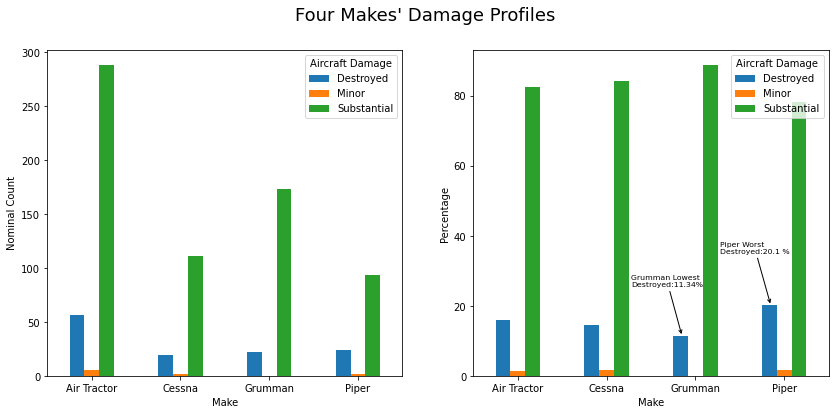

In [54]:
fig, ax = plt.subplots(ncols=2, figsize=(14,6))
work_damage.plot(kind='bar', ax=ax[0], rot=0)
ax[0].legend(title= "Aircraft Damage")
ax[0].set_xlabel('Make')
ax[0].set_ylabel("Nominal Count")
work_damage_normalized.plot(kind='bar', ax=ax[1], rot=0)
ax[1].set_xlabel('Make')
ax[1].set_ylabel("Percentage")
plt.annotate(xy=(1.85, 11.34), text="Grumman Lowest \nDestroyed:11.34%", fontsize=7.75, xytext=(1.275, 25.5), 
             arrowprops=dict(arrowstyle="->"))
plt.annotate(xy=(2.85, 20.1), text="Piper Worst \nDestroyed:20.1 %", fontsize=7.75, xytext=(2.275, 35), 
             arrowprops=dict(arrowstyle="->"))
plt.legend(title= "Aircraft Damage")
plt.suptitle("Four Makes' Damage Profiles", fontsize=18);
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/4_make_dmg_comp.jpg')

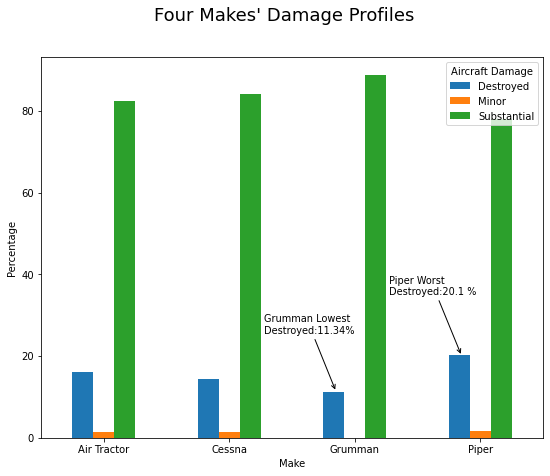

In [55]:
fig, ax = plt.subplots(figsize=(9,7))
work_damage_normalized.plot(kind='bar', ax=ax, rot=0)
ax.set_xlabel('Make')
ax.set_ylabel("Percentage")
plt.annotate(xy=(1.85, 11.34), text="Grumman Lowest \nDestroyed:11.34%", fontsize=9.75, xytext=(1.275, 25.5), 
             arrowprops=dict(arrowstyle="->"))
plt.annotate(xy=(2.85, 20.1), text="Piper Worst \nDestroyed:20.1 %", fontsize=9.75, xytext=(2.275, 35), 
             arrowprops=dict(arrowstyle="->"))
plt.legend(title= "Aircraft Damage")
plt.suptitle("Four Makes' Damage Profiles", fontsize=18);
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/4_make_dmg_comp_norm.jpg')

## Grumman highest substantial at 88.69,  AT 78.49, Cess 84, Piper 78.15

In [56]:
work_damage_normalized

aircraft_damage,Destroyed,Minor,Substantial
make,,,
Air Tractor,16.045845,1.432665,82.521490
Cessna,14.393939,1.515152,84.090909
Grumman,11.282051,NaN,88.717949
Piper,20.168067,1.680672,78.151261


In [57]:
work_injuries = filtered_aerial.groupby(
    ['make','total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']).size()
#work_injuries.drop(["Unknown"], axis=1, inplace=True)
work_injuries_normalized = work_damage.div(work_damage.sum(axis=1), axis=0) * 100

In [66]:
at_inj = (filtered_aerial[filtered_aerial['make']=="Air Tractor"][
    ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()).div(
    len(filtered_aerial[filtered_aerial['make']=="Air Tractor"]))

In [67]:
g_inj= (filtered_aerial[filtered_aerial['make']=="Grumman"][
    ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()).div(
    len(filtered_aerial[filtered_aerial['make']=="Grumman"]))

In [68]:
cess_inj = (filtered_aerial[filtered_aerial['make']=="Cessna"][
    ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()).div(
    len(filtered_aerial[filtered_aerial['make']=="Cessna"]))

In [69]:
ayr_inj= (filtered_aerial[filtered_aerial['make']=="Ayres"][
    ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()).div(
    len(filtered_aerial[filtered_aerial['make']=="Ayres"]))

In [70]:
pip_inj = (filtered_aerial[filtered_aerial['make']=="Piper"][
    ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()).div(
    len(filtered_aerial[filtered_aerial['make']=="Piper"]))

In [71]:
pip_inj

total_fatal_injuries      0.620155
total_serious_injuries    0.108527
total_minor_injuries      0.054264
dtype: float64

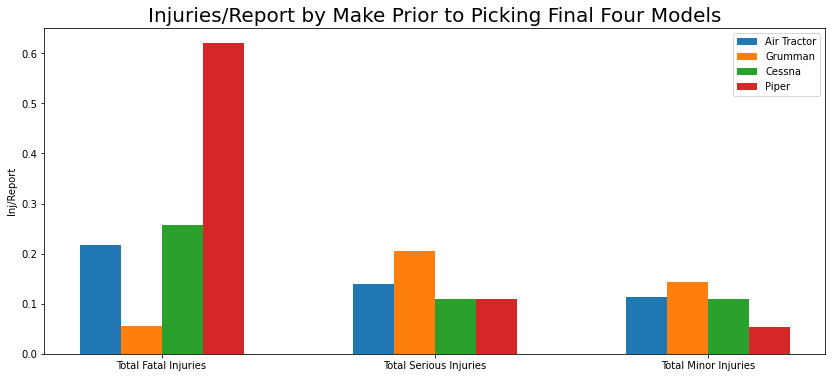

In [73]:
values = np.array([at_inj, g_inj, cess_inj, pip_inj])

x_positions = np.arange(len(values[0]))

fig, ax = plt.subplots(figsize=(14,6))

width=0.15
for i in range(len(values)):
    ax.bar(x_positions + width*i, values[i], width=width)

ax.set_ylabel('Inj/Report')
ax.set_title('Injuries/Report by Make Prior to Picking Final Four Models', fontsize=20)

injury_types = ['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries']
ax.set_xticks(x_positions + width*(len(values)-1)/2)
ax.set_xticklabels(injury_types)

makes = ['Air Tractor', 'Grumman', 'Cessna', 'Piper']
ax.legend(makes)
# plt.annotate("Grumman Has the Lowest Death Rate by Far", 
#              xy=(.8,30), fontsize=18)
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/FIIIIIINAL_4_make_inj_comp.jpg');

In [273]:
filtered_aerial[filtered_aerial['make'] == "Grumman"]['model'].value_counts()  # all 164s,

164    194
Name: model, dtype: int64

### pa 25 pawnee made 1959 - 1981, still used today

In [274]:
filtered_aerial[filtered_aerial['make'] == "Piper"]['model'].value_counts()  # 25235 and 36-2, 36-3, 

25    101
36     28
Name: model, dtype: int64

In [275]:
filtered_aerial[filtered_aerial['make'] == "Air Tractor"]['model'].value_counts()  # 25235 and 362, 363, 

502    90
602    35
301    35
802    29
Name: model, dtype: int64

### Cessna 188  1966-1983 production

In [276]:
filtered_aerial[filtered_aerial['make'] == "Cessna"]['model'].value_counts()  # 188's produced between 1966-1983

188    136
Name: model, dtype: int64

# Final Copy

In [277]:
final_work = filtered_aerial.copy()

In [278]:
final_work['make'].value_counts()

Grumman        194
Air Tractor    189
Cessna         136
Piper          129
Name: make, dtype: int64

In [279]:
final_work.head(2)

,investigation_type,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,state
59,Accident,"BRAWLEY, CA",United States,non-fatal,Substantial,Unknown,Cessna,188,1,Reciprocating,Aerial Application,0,0,0,1,VMC,Takeoff,2003,CA
184,Accident,"HOLLY GROVE, AR",United States,non-fatal,Substantial,Unknown,Air Tractor,502,1,Turbo Prop,Aerial Application,0,0,1,0,VMC,Takeoff,2003,AR


In [280]:
at_model_comp = final_work[final_work['make'] == "Air Tractor"].groupby('model')

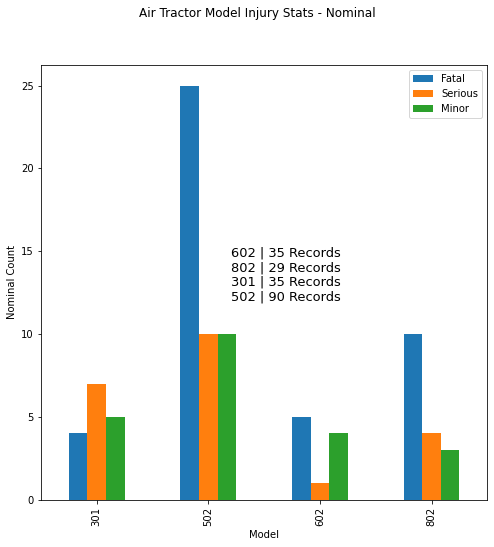

In [281]:
at_comp_gr = at_model_comp[["total_fatal_injuries", 'total_serious_injuries', 'total_minor_injuries']].sum()
at_comp_gr.plot(kind='bar', figsize=(8,8))
plt.annotate("301 | 35 Records \n502 | 90 Records", xy=(1.2, 12), fontsize=13)
plt.annotate("602 | 35 Records \n802 | 29 Records", xy=(1.2, 13.75), fontsize=13)
plt.suptitle("Air Tractor Model Injury Stats - Nominal")
plt.legend(title="Range of Injuries", bbox_to_anchor=(1, 1))
plt.legend(["Fatal", "Serious", "Minor"])
plt.ylabel("Nominal Count")
plt.xlabel("Model");

#    

In [282]:
three_oh = final_work[final_work['model'] == "301"]["aircraft_damage"].value_counts(normalize=True) *100
five_oh = final_work[final_work['model'] == "502"]["aircraft_damage"].value_counts(normalize=True) *100
six_oh = final_work[final_work['model'] == "602"]["aircraft_damage"].value_counts(normalize=True) *100
e_oh = final_work[final_work['model'] == "802"]["aircraft_damage"].value_counts(normalize=True) *100

# print("3", three_oh, "\n", "5", five_oh,"\n","6", six_oh, "\n", "8", e_oh)

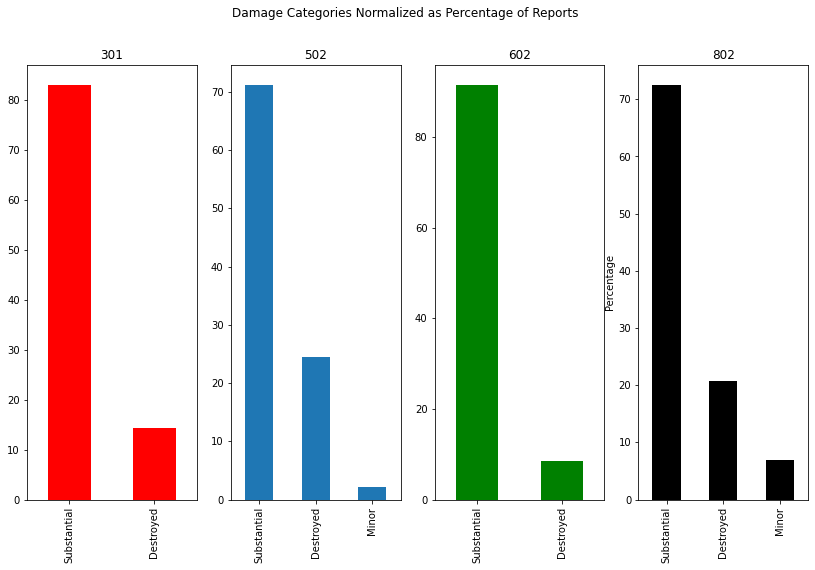

In [283]:
fig, ax = plt.subplots(ncols=4, figsize=(14,8))
five_oh.drop("Unknown").plot(kind='bar', ax=ax[1], title="502")
three_oh.drop("Unknown").plot(kind='bar', ax=ax[0], color='red', title="301")
six_oh.plot(kind='bar', ax=ax[2], color='green', title="602")
e_oh.plot(kind='bar', ax=ax[3], color='black', title="802")
plt.suptitle("Damage Categories Normalized as Percentage of Reports")
plt.ylabel("Percentage");

# 301 would be my recommendation

In [284]:
three_doh = final_work[final_work['model'] == "301"]["injury_severity"].value_counts(normalize=True) *100
five_doh = final_work[final_work['model'] == "502"]["injury_severity"].value_counts(normalize=True) *100
six_doh = final_work[final_work['model'] == "602"]["injury_severity"].value_counts(normalize=True) *100
e_doh = final_work[final_work['model'] == "802"]["injury_severity"].value_counts(normalize=True) *100


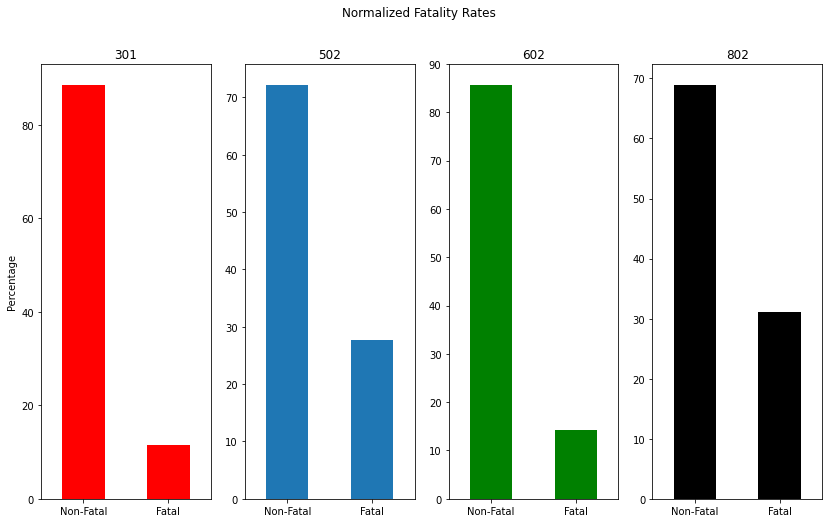

In [285]:
fig, ax = plt.subplots(ncols=4, figsize=(14,8))
five_doh.plot(kind='bar', ax=ax[1], title="502", rot=0)
ax[1].set_xticks([0,1])
ax[1].set_xticklabels(["Non-Fatal", "Fatal"])
three_doh.plot(kind='bar', ax=ax[0], color='red', title="301", rot=0)
ax[0].set_xticks([0,1])
ax[0].set_xticklabels(["Non-Fatal", "Fatal"])
six_doh.plot(kind='bar', ax=ax[2], color='green', title="602", rot=0)
ax[2].set_xticks([0,1])
ax[2].set_xticklabels(["Non-Fatal", "Fatal"])
e_doh.plot(kind='bar', ax=ax[3], color='black', title="802", rot=0)
ax[3].set_xticks([0,1])
ax[3].set_xticklabels(["Non-Fatal", "Fatal"])
ax[0].set_ylabel("Percentage")
plt.suptitle("Normalized Fatality Rates");

In [384]:
six_oh

Substantial    91.428571
Destroyed       8.571429
Name: aircraft_damage, dtype: float64

In [383]:
three_oh

Substantial    82.857143
Destroyed      14.285714
Unknown         2.857143
Name: aircraft_damage, dtype: float64

In [382]:
six_doh

non-fatal    85.714286
fatal        14.285714
Name: injury_severity, dtype: float64

In [381]:
three_doh

non-fatal    88.571429
fatal        11.428571
Name: injury_severity, dtype: float64

# 301 WINS, lower ratio of deaths and destruction / report!!!!!!!

# Piper comps.....

In [286]:
p_model_comp = final_work[final_work['make'] == "Piper"].groupby('model')

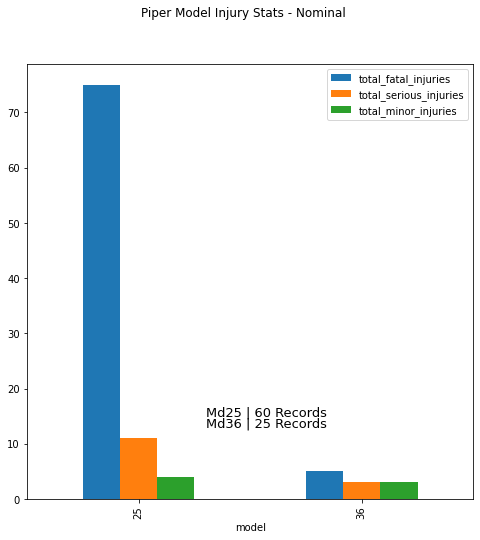

In [287]:
p_comp_gr = p_model_comp[["total_fatal_injuries", 'total_serious_injuries', 'total_minor_injuries']].sum()
p_comp_gr.plot(kind='bar', figsize=(8,8))
plt.annotate("Md25 | 60 Records", xy=(.3, 15), fontsize=13)
plt.annotate("Md36 | 25 Records", xy=(.3, 13), fontsize=13)
plt.suptitle("Piper Model Injury Stats - Nominal");

In [288]:
len(final_work[final_work['model'] == "36"])

28

In [289]:
two_f = final_work[final_work['model'] == "25"]["aircraft_damage"].value_counts(normalize=True) *100
three_s = final_work[final_work['model'] == "36"]["aircraft_damage"].value_counts(normalize=True) *100



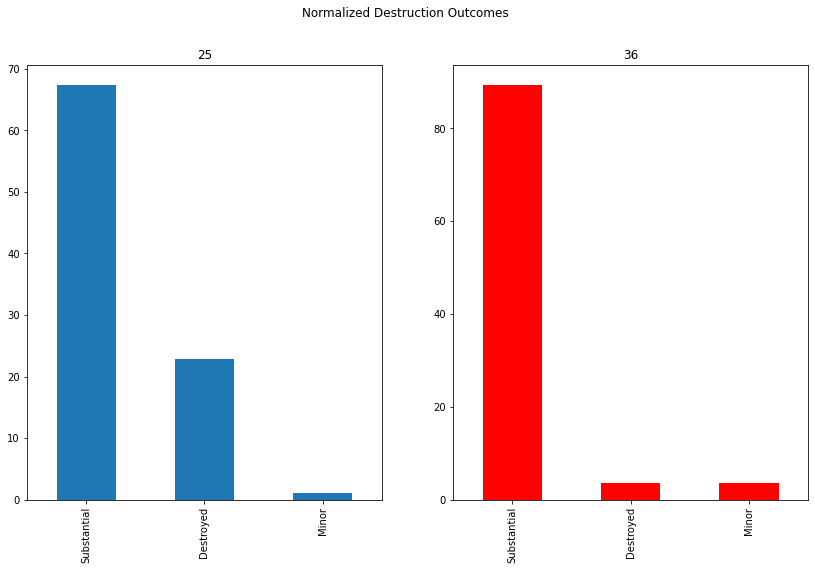

In [290]:
fig, ax = plt.subplots(ncols=2, figsize=(14,8))
two_f.drop("Unknown").plot(kind='bar', ax=ax[0], title="25")
three_s.drop("Unknown").plot(kind='bar', ax=ax[1], color='red', title="36")

plt.suptitle("Normalized Destruction Outcomes");

In [291]:
two_fd = final_work[final_work['model'] == "25"]["injury_severity"].value_counts(normalize=True) *100
three_sd = final_work[final_work['model'] == "36"]["injury_severity"].value_counts(normalize=True) *100



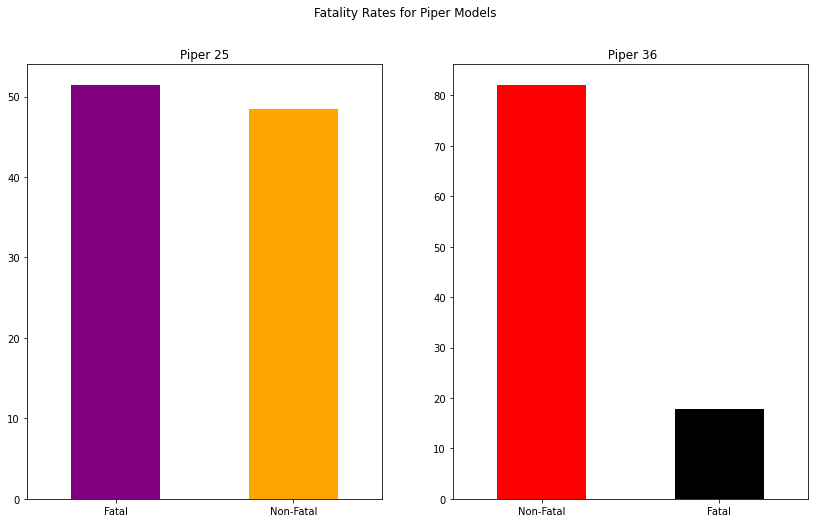

In [292]:
fig, ax = plt.subplots(ncols=2, figsize=(14,8))
two_fd.plot(kind='bar', ax=ax[0], title="Piper 25", color=["purple", "orange"])
three_sd.plot(kind='bar', ax=ax[1], color=['red', 'black'], title=" Piper 36")
plt.suptitle("Fatality Rates for Piper Models")
ax[0].set_xticklabels(["Fatal", "Non-Fatal"], rotation=0)
ax[1].set_xticklabels(["Non-Fatal", "Fatal"], rotation=0);

# 36 is the preferred model!!!!! 

### Definitely

# Final 4 are Grumman164, AT 301, Cessna 188, Piper 36

In [293]:
final_work['model'].unique()

array(['188', '502', '36', '301', '25', '602', '164', '802'], dtype=object)

In [294]:
four_list= ['301', '188', '36', '164']

In [295]:
four = final_work.loc[(final_work['model'].isin(four_list)==True)]

In [296]:
four['model'].value_counts()

164    194
188    136
301     35
36      28
Name: model, dtype: int64

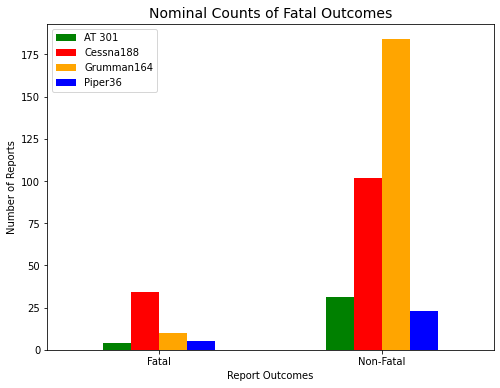

In [396]:
ax = four.groupby(['injury_severity', "make"])['model'].size().unstack().plot(kind='bar', stacked=False, 
                figsize=(8,6), rot=0, color=['green', 'red', 'orange', 'blue'])
plt.legend(title="Make")
plt.legend(["AT 301", "Cessna188", "Grumman164", "Piper36"])
plt.ylabel("Number of Reports")
plt.xlabel("Report Outcomes")
ax.set_xticklabels(["Fatal", "Non-Fatal"])
plt.title("Nominal Counts of Fatal Outcomes", fontsize=14)
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/4_MODEL_inj_comp.jpg');

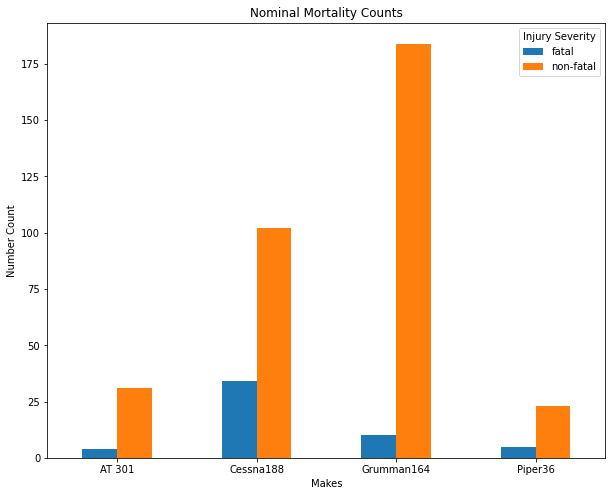

In [300]:
f_g = four.groupby(['make', 'injury_severity']).size().unstack()
ax = f_g.plot(kind='bar', stacked=False, figsize=(10, 8), rot=0)
plt.title("Nominal Mortality Counts")
plt.legend(title="Injury Severity")
plt.xlabel("Makes")
plt.ylabel("Number Count")
ax.set_xticklabels(["AT 301", "Cessna188", "Grumman164", "Piper36"])
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/4_MODEL_fat_comp.jpg');

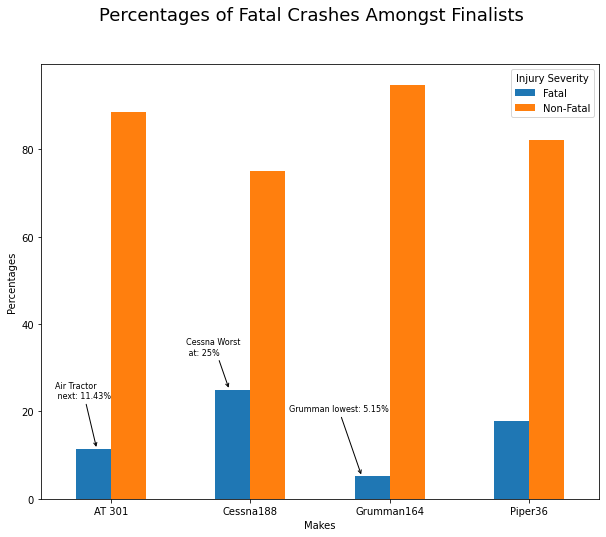

In [301]:
f_g_normalized = f_g.div(f_g.sum(axis=1), axis=0) * 100
ax = f_g_normalized.plot(kind='bar', stacked=False, figsize=(10, 8), rot=0)
plt.suptitle("Percentages of Fatal Crashes Amongst Finalists", fontsize=18)
plt.xlabel("Makes")
plt.ylabel("Percentages")
plt.legend(["Fatal", "Non-Fatal"], title="Injury Severity")
plt.annotate(text="Grumman lowest: 5.15%", xy=(1.8, 5.15), fontsize=8, 
             xytext=(1.275, 20), arrowprops=dict(arrowstyle='->'))
plt.annotate(text="Air Tractor \n next: 11.43%", xy=(-.1, 11.43), fontsize=8, 
             xytext=(-0.4, 23), arrowprops=dict(arrowstyle='->'))
plt.annotate(text="Cessna Worst \n at: 25%", xy=(.85, 25), fontsize=8, 
             xytext=(.54, 33), arrowprops=dict(arrowstyle='->'))
ax.set_xticklabels(["AT 301", "Cessna188", "Grumman164", "Piper36"])
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/4_MODEL_inj_NORM.jpg');

In [302]:
f_g_normalized

injury_severity,fatal,non-fatal
make,,
Air Tractor,11.428571,88.571429
Cessna,25.000000,75.000000
Grumman,5.154639,94.845361
Piper,17.857143,82.142857


In [303]:
four_damage = four.groupby(['make','aircraft_damage']).size().unstack()
four_damage.drop(["Unknown"], axis=1, inplace=True)
four_damage_normalized = four_damage.div(work_damage.sum(axis=1), axis=0) * 100

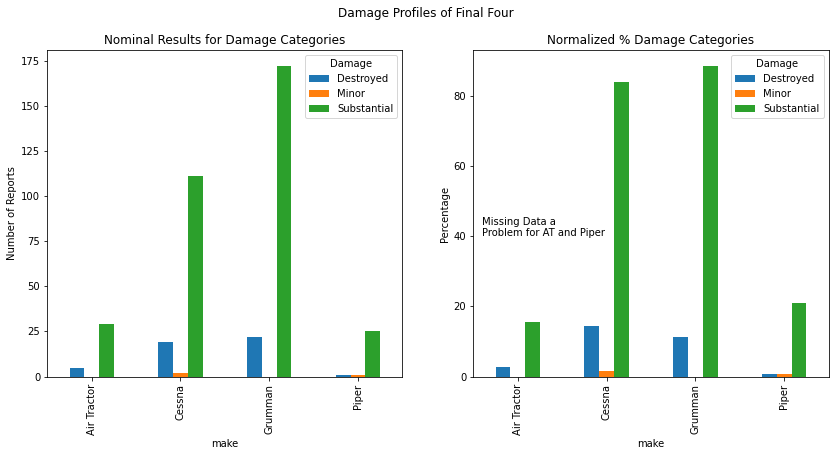

In [304]:
fig, ax = plt.subplots(ncols=2, figsize=(14,6))
four_damage.plot(kind='bar', ax=ax[0])
four_damage_normalized.plot(kind='bar', ax=ax[1])
ax[0].set_title("Nominal Results for Damage Categories")
ax[1].set_title("Normalized % Damage Categories")
ax[0].legend(title="Damage")
ax[0].set_ylabel("Number of Reports")
ax[1].set_ylabel("Percentage")
ax[1].legend(title="Damage")
plt.suptitle("Damage Profiles of Final Four")
ax[1].annotate(xy=(-.4,40), text="Missing Data a \nProblem for AT and Piper");

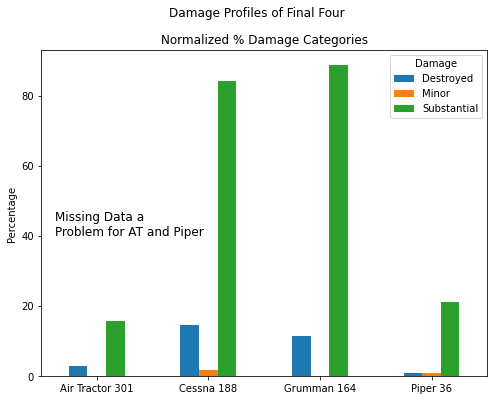

In [426]:
fig, ax = plt.subplots(figsize=(8,6))
four_damage_normalized.plot(kind='bar', ax=ax, rot=0)
ax.set_title("Normalized % Damage Categories")
ax.set_ylabel("Percentage")
ax.legend(title="Damage")
ax.set_xlabel("")
ax.set_xticklabels(['Air Tractor 301','Cessna 188', 'Grumman 164', 'Piper 36'])
plt.suptitle("Damage Profiles of Final Four")
ax.annotate(xy=(-.375,40), fontsize=12, text="Missing Data a \nProblem for AT and Piper")
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/4_MODEL_dmgs_NORM.jpg');

In [305]:
four_damage_normalized

aircraft_damage,Destroyed,Minor,Substantial
make,,,
Air Tractor,2.688172,NaN,15.591398
Cessna,14.393939,1.515152,84.090909
Grumman,11.340206,NaN,88.659794
Piper,0.840336,0.840336,21.008403


In [400]:
four.head(2)

,investigation_type,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,state
59,Accident,"BRAWLEY, CA",United States,non-fatal,Substantial,Unknown,Cessna,188,1,Reciprocating,Aerial Application,0,0,0,1,VMC,Takeoff,2003,CA
394,Accident,"HERALD, CA",United States,non-fatal,Minor,Unknown,Piper,36,1,Reciprocating,Aerial Application,0,0,0,2,VMC,Landing,2003,CA


In [ ]:
 = four.groupby(['make','aircraft_damage'])[["total_fatal_injuries", .size().unstack()
four_damage.drop(["Unknown"], axis=1, inplace=True)
four_damage_normalized = four_damage.div(work_damage.sum(axis=1), axis=0) * 100

In [306]:
Piper "Md36 | 25 Records

SyntaxError: EOL while scanning string literal (<ipython-input-306-93f0b6b7f88a>, line 1)

In [307]:
AT 301 : 64 records

SyntaxError: invalid syntax (<ipython-input-307-7e3c4dd5ddbd>, line 1)

In [308]:
len(four[four['make'] == "Grumman"])

194

In [310]:
# cessna = 120

In [264]:
work_injuries = filtered_aerial.groupby(
    ['make','total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']).size()
#work_injuries.drop(["Unknown"], axis=1, inplace=True)
work_injuries_normalized = work_damage.div(work_damage.sum(axis=1), axis=0) * 100

In [403]:
at_inj_f = (four[four['make']=="Air Tractor"][
    ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()).div(
    len(four[four['make']=="Air Tractor"])) * 100

In [404]:
g_inj_f= (four[four['make']=="Grumman"][
    ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()).div(
    len(four[four['make']=="Grumman"])) * 100

In [405]:
cess_inj_f = (four[four['make']=="Cessna"][
    ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()).div(
    len(four[four['make']=="Cessna"])) * 100

In [406]:
pip_inj_f = (four[four['make']=="Piper"][
    ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()).div(
    len(four[four['make']=="Piper"])) * 100

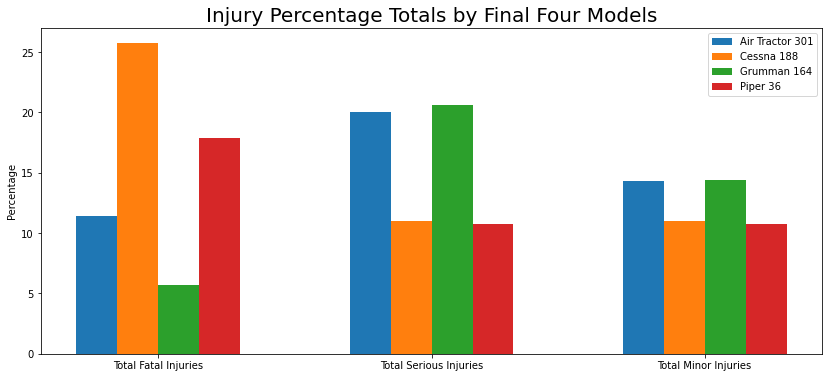

In [417]:
values = np.array([at_inj_f, cess_inj_f, g_inj_f, pip_inj_f])

x_positions = np.arange(len(values[0]))

fig, ax = plt.subplots(figsize=(14,6))

width=0.15
for i in range(len(values)):
    ax.bar(x_positions + width*i, values[i], width=width)

ax.set_ylabel('Percentage')
ax.set_title('Injury Percentage Totals by Final Four Models', fontsize=20)

injury_types = ['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries']
ax.set_xticks(x_positions + width*(len(values)-1)/2)
ax.set_xticklabels(injury_types)

makes = ['Air Tractor 301','Cessna 188', 'Grumman 164', 'Piper 36']
# ax.legend(makes)
colors = ["green", "red", "orange", "blue"]
ax.legend(makes)
# plt.annotate("Grumman Has the Lowest Death Rate by Far", 
#              xy=(.8,30), fontsize=18)
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/4_final_inj_comp.jpg');

## Clearly Worse Performance in Worse Weather as well, 3/3 in favor of Grumman

In [311]:
large_craft = top_ten_df.loc[(top_ten_df['make'] == "Boeing") | (top_ten_df['make'] == "Airbus") ]

In [312]:
large_craft.head(2)

,investigation_type,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,state
44,Incident,"KAHULUI, HI",United States,non-fatal,Unknown,Unknown,Boeing,717200,2,Turbo Fan,Unknown,0,0,0,87,VMC,Climb,2003,HI
47,Incident,"Salt Lake City, UT",United States,non-fatal,Minor,Unknown,Boeing,757222,2,Turbo Fan,Unknown,0,0,0,140,VMC,Cruise,2003,UT


In [313]:
df.head()

,investigation_type,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,state
0,Accident,"TUCSON, AZ",United States,fatal,Destroyed,Unknown,Beech,95,2,Reciprocating,Personal,1,3,0,0,VMC,Takeoff,2003,AZ
1,Accident,"Milford, UT",United States,non-fatal,Destroyed,Unknown,Aircraft Mfg & Dev. Co. (Amd),Ch2000,1,Reciprocating,Instructional,0,2,0,0,VMC,Cruise,2003,UT
2,Accident,"IDAHO FALLS, ID",United States,non-fatal,Substantial,Unknown,Bell,47G,1,Turbo Shaft,Other Work Use,0,0,0,1,VMC,Cruise,2003,ID
3,Accident,"NEW PORT RICHEY, FL",United States,non-fatal,Substantial,Unknown,Hughes,Oh6,1,Turbo Shaft,Public Aircraft,0,0,0,2,VMC,Takeoff,2003,FL
4,Accident,"Shreveport, LA",United States,fatal,Destroyed,Unknown,Grumman American,Aa1A,1,Reciprocating,Personal,2,0,0,0,VMC,Takeoff,2003,LA


# Adding a Column For States Names

In [314]:
central = ["WI", 'MN', 'IL', 'IA', 'IN', 'MI', 'MO', 'KS', 'ND', 'SD', 'NE', 'OK', 'TX']
northeast = ["ME", 'WV', 'DC', 'OH', 'RI', 'NH', 'VT', 'CT', 'PA', 'MA', 'DE', 'NY', 'NJ', 'MD']
southeast = ['VA', 'NC', 'SC', 'GA', 'AL', 'MS', 'LA', 'TN', 'AR', 'KY', 'FL']
west = ['MT', 'WY', 'CO', 'NM', 'AZ', 'NV', 'UT', 'ID', 'WA', 'OR', 'CA', 'HI', 'AK']

In [315]:
northeast_states = df.loc[(df['state'].isin(northeast)  == True) & (df["country"] == 'United States')]
southeast_states = df.loc[(df['state'].isin(southeast)  == True) & (df["country"] == 'United States')]
central_states = df.loc[(df['state'].isin(central)  == True) & (df["country"] == 'United States')]
west_states = df.loc[(df['state'].isin(west)  == True) & (df["country"] == 'United States')]

# Regional Reports

In [316]:
state_reports = [len(northeast_states), len(southeast_states), len(central_states),  len(west_states)]

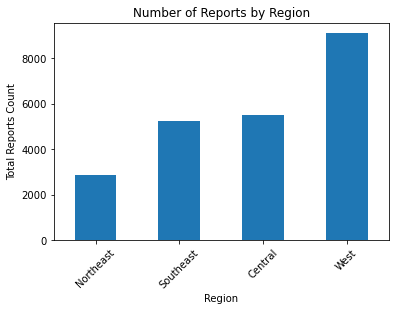

In [317]:
df_state_reports = pd.DataFrame(state_reports, columns=['Count'])
df_state_reports.plot(kind='bar', legend=False)
plt.xticks(range(len(state_reports)), ['Northeast', 'Southeast', 'Central', 'West'], rotation=45)
plt.xlabel('Region')
plt.ylabel('Total Reports Count')
plt.title('Number of Reports by Region');

In [318]:
ne_plot = northeast_states.loc[:, ['total_fatal_injuries', 'total_serious_injuries', "total_minor_injuries" ]].sum()
se_plot = southeast_states.loc[:, ['total_fatal_injuries', 'total_serious_injuries', "total_minor_injuries"]].sum() 
c_plot = central_states.loc[:, ['total_fatal_injuries', 'total_serious_injuries', "total_minor_injuries"]].sum() 
w_plot = west_states.loc[:, ['total_fatal_injuries', 'total_serious_injuries', "total_minor_injuries"]].sum()

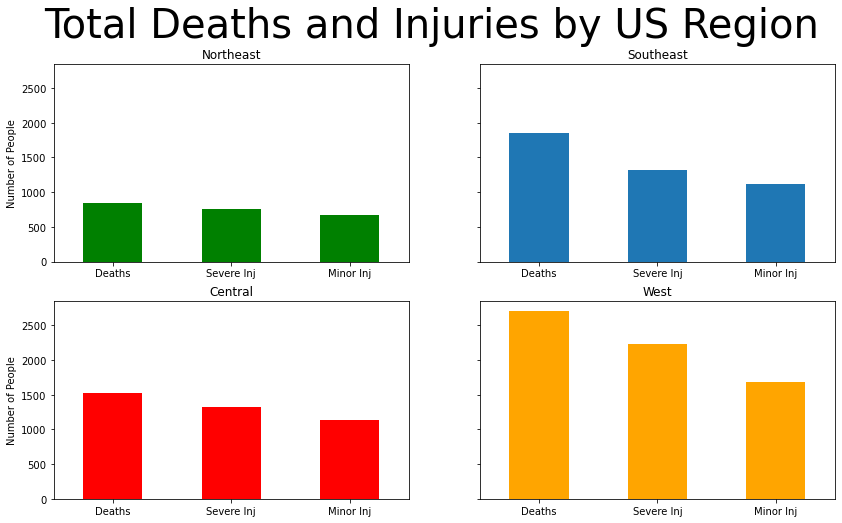

In [319]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(14,8), sharey=True)
fig.suptitle("Total Deaths and Injuries by US Region", fontsize=40)
ne_plot.plot(kind='bar', title='Northeast', ylabel="Number of People", ax=ax[0][0], rot=0, color='green')
se_plot.plot(kind='bar', title='Southeast', ax=ax[0][1], rot=0)
c_plot.plot(kind='bar', title='Central', ylabel="Number of People", ax=ax[1][0], rot=0, color='red')
w_plot.plot(kind='bar', title='West',  ax= ax[1][1], rot=0, color='orange')

ax[0][0].set_xticklabels(["Deaths", "Severe Inj", "Minor Inj"])
ax[0][1].set_xticklabels(["Deaths", "Severe Inj", "Minor Inj"])
ax[1][1].set_xticklabels(["Deaths", "Severe Inj", "Minor Inj"])
ax[1][0].set_xticklabels(["Deaths", "Severe Inj", "Minor Inj"])
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/regional_inj.jpg');

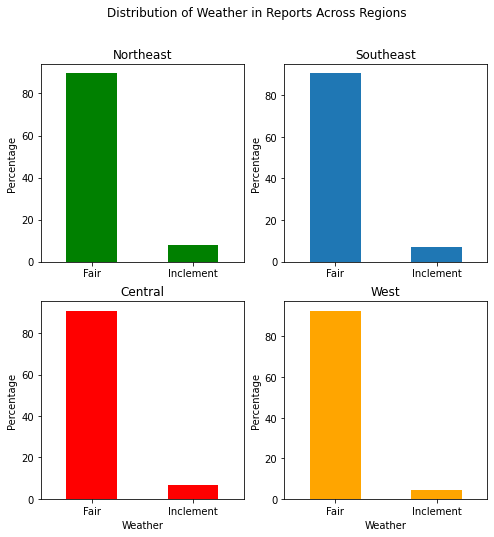

In [320]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
fig.suptitle("Distribution of Weather in Reports Across Regions")
(northeast_states['weather_condition'].value_counts(normalize=True).drop(["Unk", 'Unknown'])*100).plot(
    kind='bar', title="Northeast", rot=0,
    ylabel="Percentage", ax=ax[0][0], color='green')
ax[0][0].set_xticklabels(["Fair", "Inclement"])

(southeast_states['weather_condition'].value_counts(normalize=True).drop(["Unk", 'Unknown'])*100).plot(
    kind='bar', title="Southeast", rot=0,
    ylabel="Percentage", ax=ax[0][1])
ax[0][1].set_xticklabels(["Fair", "Inclement"])

(central_states['weather_condition'].value_counts(normalize=True).drop(["Unk", 'Unknown'])*100).plot(
    kind='bar', title="Central", rot=0, color='red',
    ylabel="Percentage", xlabel="Weather", ax=ax[1][0])
ax[1][0].set_xticklabels(["Fair", "Inclement"])

(west_states['weather_condition'].value_counts(normalize=True).drop(["Unk", 'Unknown'])*100).plot(
    kind='bar', title="West", rot=0, color='orange',
    ylabel="Percentage", xlabel="Weather", ax=ax[1][1])
ax[1][1].set_xticklabels(["Fair", "Inclement"])
plt.savefig('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/regional_weather.jpg');

In [547]:
ne_plot = northeast_states.loc[:, ['total_fatal_injuries', 'total_serious_injuries', "total_minor_injuries" ]].sum()
se_plot = southeast_states.loc[:, ['total_fatal_injuries', 'total_serious_injuries', "total_minor_injuries"]].sum() 
c_plot = central_states.loc[:, ['total_fatal_injuries', 'total_serious_injuries', "total_minor_injuries"]].sum() 
w_plot = west_states.loc[:, ['total_fatal_injuries', 'total_serious_injuries', "total_minor_injuries"]].sum()

In [556]:
southeast_states

(5252, 19)

In [567]:
w_plot

total_fatal_injuries      2712
total_serious_injuries    2235
total_minor_injuries      1686
dtype: int64

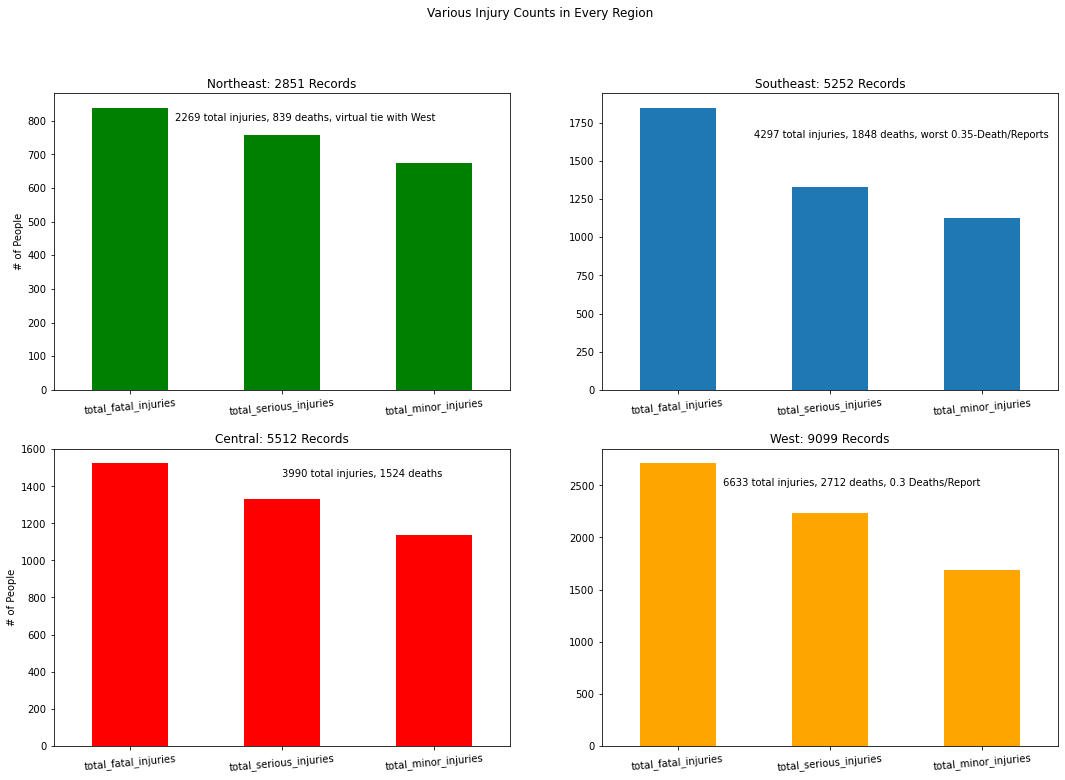

In [607]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(18,12))
ne_plot.plot(kind='bar', color='green', ax=ax[0][0], rot=5, title="Northeast: 2851 Records", ylabel="# of People")
ax[0][0].annotate(text="2269 total injuries, 839 deaths, virtual tie with West", xy=(.3, 800))
se_plot.plot(kind='bar', ax=ax[0][1], rot=5, title="Southeast: 5252 Records")
ax[0][1].annotate(text="4297 total injuries, 1848 deaths, worst 0.35-Death/Reports", xy=(.5, 1650))
c_plot.plot(kind='bar', color='red', ax=ax[1][0], rot=5, title="Central: 5512 Records", ylabel="# of People")
ax[1][0].annotate(text="3990 total injuries, 1524 deaths", xy=(1, 1450))
w_plot.plot(kind='bar', color='orange', ax=ax[1][1], rot=5, title="West: 9099 Records")
ax[1][1].annotate(text="6633 total injuries, 2712 deaths, 0.3 Deaths/Report", xy=(.3, 2500))
plt.suptitle("Various Injury Counts in Every Region");

### Ratios - NE: .29 DpR, SE:.35 DpR, C: .27 DpR, W: .30 DpR - Southeast has highest deaths/record

In [570]:
northeast_states.head(2)

,investigation_type,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,states
22,Accident,"MORRISTOWN, NJ",United States,non-fatal,Substantial,Unknown,Mooney,20J,1,Reciprocating,Personal,0,0,0,2,VMC,Takeoff,2003,NJ
23,Accident,"CLEVELAND, OH",United States,non-fatal,Substantial,Unknown,Embraer,Erj-145Lr,2,Turbo Fan,Unknown,0,0,0,50,IMC,Landing,2003,OH


In [574]:
ne_dmg = (northeast_states["aircraft_damage"].value_counts(normalize=True) * 100)
se_dmg = (southeast_states["aircraft_damage"].value_counts(normalize=True) * 100)
c_dmg = (central_states["aircraft_damage"].value_counts(normalize=True) * 100)
w_dmg = (west_states["aircraft_damage"].value_counts(normalize=True) * 100)

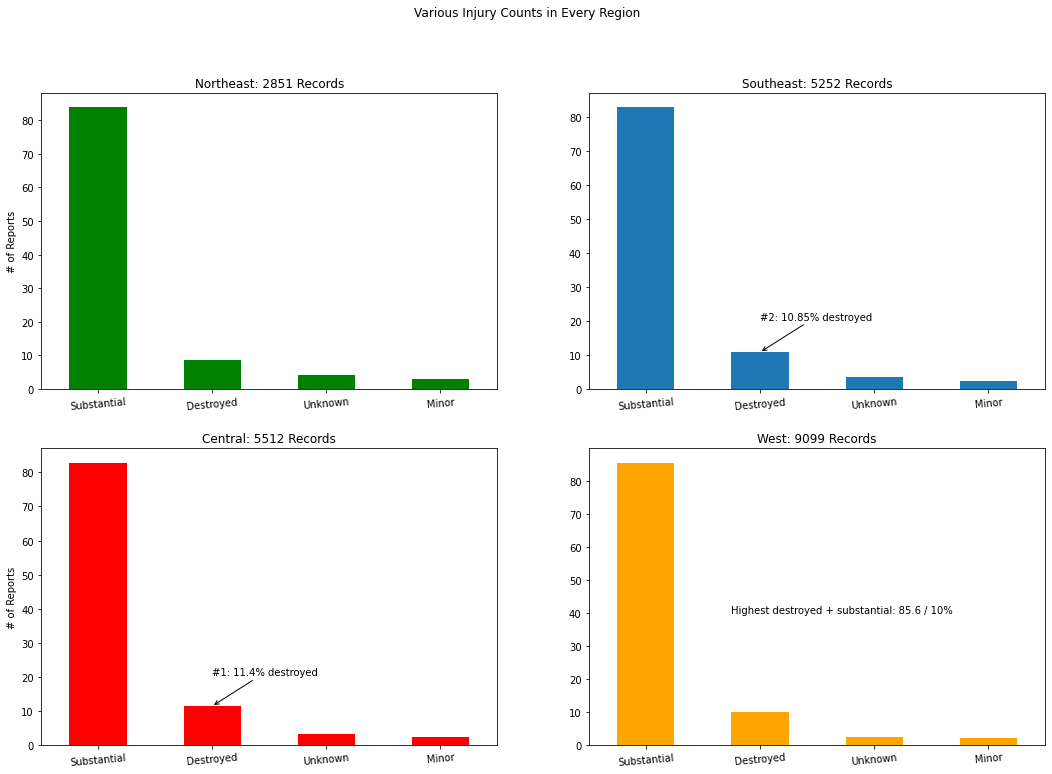

In [601]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(18,12))
ne_dmg.plot(kind='bar', color='green', ax=ax[0][0], rot=5, title="Northeast: 2851 Records", ylabel="# of Reports")
#ax[0][0].annotate(text="2269 total injuries, 839 deaths", xy=(1, 800))
se_dmg.plot(kind='bar', ax=ax[0][1], rot=5, title="Southeast: 5252 Records")
ax[0][1].annotate(text= "#2: 10.85% destroyed", xy=(1, 10.85), xytext=(1, 20.4), arrowprops=dict(arrowstyle='->'))
c_dmg.plot(kind='bar', color='red', ax=ax[1][0], rot=5, title="Central: 5512 Records", ylabel="# of Reports")
ax[1][0].annotate(text= "#1: 11.4% destroyed", xy=(1, 11.4), xytext=(1, 20.4), arrowprops=dict(arrowstyle='->'))
w_dmg.plot(kind='bar', color='orange', ax=ax[1][1], rot=5, title="West: 9099 Records")
ax[1][1].annotate(text="Highest destroyed + substantial: 85.6 / 10%", xy=(.75, 40))
plt.suptitle("Various Injury Counts in Every Region");

In [577]:
ne_dmg

Substantial    83.970537
Destroyed       8.733778
Unknown         4.209049
Minor           3.086636
Name: aircraft_damage, dtype: float64

In [578]:
se_dmg

Substantial    83.015994
Destroyed      10.853008
Unknown         3.693831
Minor           2.437167
Name: aircraft_damage, dtype: float64

In [579]:
c_dmg

Substantial    82.891872
Destroyed      11.429608
Unknown         3.211176
Minor           2.467344
Name: aircraft_damage, dtype: float64

In [580]:
w_dmg

Substantial    85.668755
Destroyed      10.056050
Unknown         2.307946
Minor           1.967249
Name: aircraft_damage, dtype: float64

In [ ]:
ax[0][0].annotate(text="18.0% Destroyed", xy=(1, 18.), 
        xytext=(.5, 40), arrowprops=dict(arrowstyle='->'))

In [92]:
df.head()

,investigation_type,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,states
2,Accident,"TUCSON, AZ",United States,fatal,Destroyed,Unknown,Beech,95,2,Reciprocating,Personal,1,3,0,0,VMC,Takeoff,2003,AZ
3,Accident,"Milford, UT",United States,non-fatal,Destroyed,Unknown,Aircraft Mfg & Dev. Co. (Amd),Ch2000,1,Reciprocating,Instructional,0,2,0,0,VMC,Cruise,2003,UT
5,Accident,"IDAHO FALLS, ID",United States,non-fatal,Substantial,Unknown,Bell,47G,1,Turbo Shaft,Other Work Use,0,0,0,1,VMC,Cruise,2003,ID
6,Accident,"NEW PORT RICHEY, FL",United States,non-fatal,Substantial,Unknown,Hughes,Oh-6,1,Turbo Shaft,Public Aircraft,0,0,0,2,VMC,Takeoff,2003,FL
7,Accident,"Shreveport, LA",United States,fatal,Destroyed,Unknown,Grumman American,Aa-1A,1,Reciprocating,Personal,2,0,0,0,VMC,Takeoff,2003,LA
